<a href="https://colab.research.google.com/github/VladSopot/Car-crashes-in-USA/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Fatal Car Crashes In USA**

## Introduction

Data Source: https://www.kaggle.com/datasets/jonbown/us-2020-traffic-accidents
The US Traffic Accidents dataset contains detailed information on 259,077 car accidents that occurred in all US states (except remote areas of Alaska and Hawaii) between 2016 and 2020. The datasets have very detailed information on each accident including location, time, weather, contributing factors and demographic information of the motorists involved in the accident.

Each year has three files, 'acc' = accident information, 'pers' = demographic and other information relating to individuals involved in the accident, 'veh' detailed vehicle information for the vehicles involved in the reported accident. All these files will join on the variable 'CASENUM'

A project presented below contains data related to statistics of car accidents in USA between 2016 and 2020. By using mentioned dataset I am going to build a model based on a fact of a car accident that has taken place in real life. The main purpose of this learning machine is to make a prediction about mortality in a car accident.

# Libraries & Imports

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
# importing the Google Colab library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# set the number of rows to be displayed
pd.set_option('display.max_rows', 100)

# Data Import

In [4]:
# set the data path where the data files are located
data_path="/content/drive/MyDrive/Data/"
data_list=os.listdir(data_path)

In [5]:
# read and concatenate multiple CSV files with filenames starting with the given prefix into a single DataFrame
def read_data_subset(data_prefix):
  filtered_files=[x for x in data_list if x.startswith(data_prefix)]
  df_list = [pd.read_csv(data_path+file,encoding='cp1252') for file in filtered_files]
  df = pd.concat(df_list)

  return df

In [6]:
# read and store data from three subsets: accidents, persons, and vehicles
acc_df = read_data_subset('acc')
pers_df = read_data_subset('pers')
veh_df = read_data_subset('veh')

<ipython-input-5-d86642b087be>:4: DtypeWarning: Columns (26,27,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(data_path+file,encoding='cp1252') for file in filtered_files]
<ipython-input-5-d86642b087be>:4: DtypeWarning: Columns (26,27,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(data_path+file,encoding='cp1252') for file in filtered_files]
<ipython-input-5-d86642b087be>:4: DtypeWarning: Columns (23,24,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(data_path+file,encoding='cp1252') for file in filtered_files]
<ipython-input-5-d86642b087be>:4: DtypeWarning: Columns (45,47,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(data_path+file,encoding='cp1252') for file in filtered_files]
<ipython-input-5-d86642b087be>:4: DtypeWarning: Columns (45,47,127) have mixed types

# Exploratory Data Analysis

In [ ]:
# for the next few steps I'll display information about the structure and data types of the different DataFrames
# and generate descriptive statistics of the numerical columns in DataFrames
acc_df.describe()
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259077 entries, 0 to 54408
Data columns (total 90 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CASENUM         259077 non-null  int64  
 1   PSU             259077 non-null  int64  
 2   PJ              259077 non-null  int64  
 3   STRATUM         259077 non-null  int64  
 4   VE_TOTAL        259077 non-null  int64  
 5   VE_FORMS        259077 non-null  int64  
 6   PVH_INVL        259077 non-null  int64  
 7   PEDS            259077 non-null  int64  
 8   PERMVIT         259077 non-null  int64  
 9   PERNOTMVIT      259077 non-null  int64  
 10  NUM_INJ         259077 non-null  int64  
 11  MONTH           259077 non-null  int64  
 12  YEAR            259077 non-null  int64  
 13  DAY_WEEK        259077 non-null  int64  
 14  HOUR            259077 non-null  int64  
 15  MINUTE          259077 non-null  int64  
 16  HARM_EV         259077 non-null  int64  
 17  ALCOHOL    

In [ ]:
acc_df.describe()

,CASENUM,PSU,PJ,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERMVIT,PERNOTMVIT,...,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,URBANICITY,REGION,PSUSTRAT,PSU_VAR,WEIGHT,YEARNAME,MINUTE_IMNAME
count,2.590770e+05,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,...,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,259077.000000,109154.000000,109154.000000
mean,2.018075e+11,47.444358,1702.082335,7.204206,1.818255,1.765166,0.053088,0.088977,2.389355,0.097450,...,0.980952,0.770794,1.939898,1.233479,2.731856,12.530699,51.127634,123.571403,2019.501539,28.329461
std,1.415381e+08,19.540589,1364.002507,2.546492,0.651716,0.645642,0.275751,0.298504,1.429926,0.323964,...,1.158189,0.984469,0.237676,0.423045,0.880034,6.201508,31.416029,80.969896,0.500000,17.543693
min,2.016000e+11,10.000000,45.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.861913,2019.000000,0.000000
25%,2.017003e+11,32.000000,505.000000,6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,2.000000,8.000000,32.000000,51.257155,2019.000000,14.000000
50%,2.018009e+11,48.000000,1374.000000,8.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,3.000000,12.000000,48.000000,132.861974,2020.000000,29.000000
75%,2.019020e+11,63.000000,2793.000000,9.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,3.000000,16.000000,65.000000,171.329185,2020.000000,44.000000
max,2.020030e+11,83.000000,4153.000000,10.000000,15.000000,15.000000,10.000000,11.000000,75.000000,11.000000,...,8.000000,29.000000,2.000000,2.000000,4.000000,25.000000,214.000000,994.507448,2020.000000,59.000000


In [ ]:
# compute the percentage of missing values in each column, create a DataFrame to store the column names and their corresponding percentage of missing values,
# and create a bar plot to visualize the percentage of missing values
def plot_missing_data(df):
  missing_data = df.isnull().mean()
  a = pd.DataFrame({'pct_missing': missing_data}).reset_index()
  sns.set(rc={'figure.figsize':(30,5)})
  sns.barplot(data=a, x='index', y='pct_missing')
  plt.xticks(rotation=90)
  plt.show()

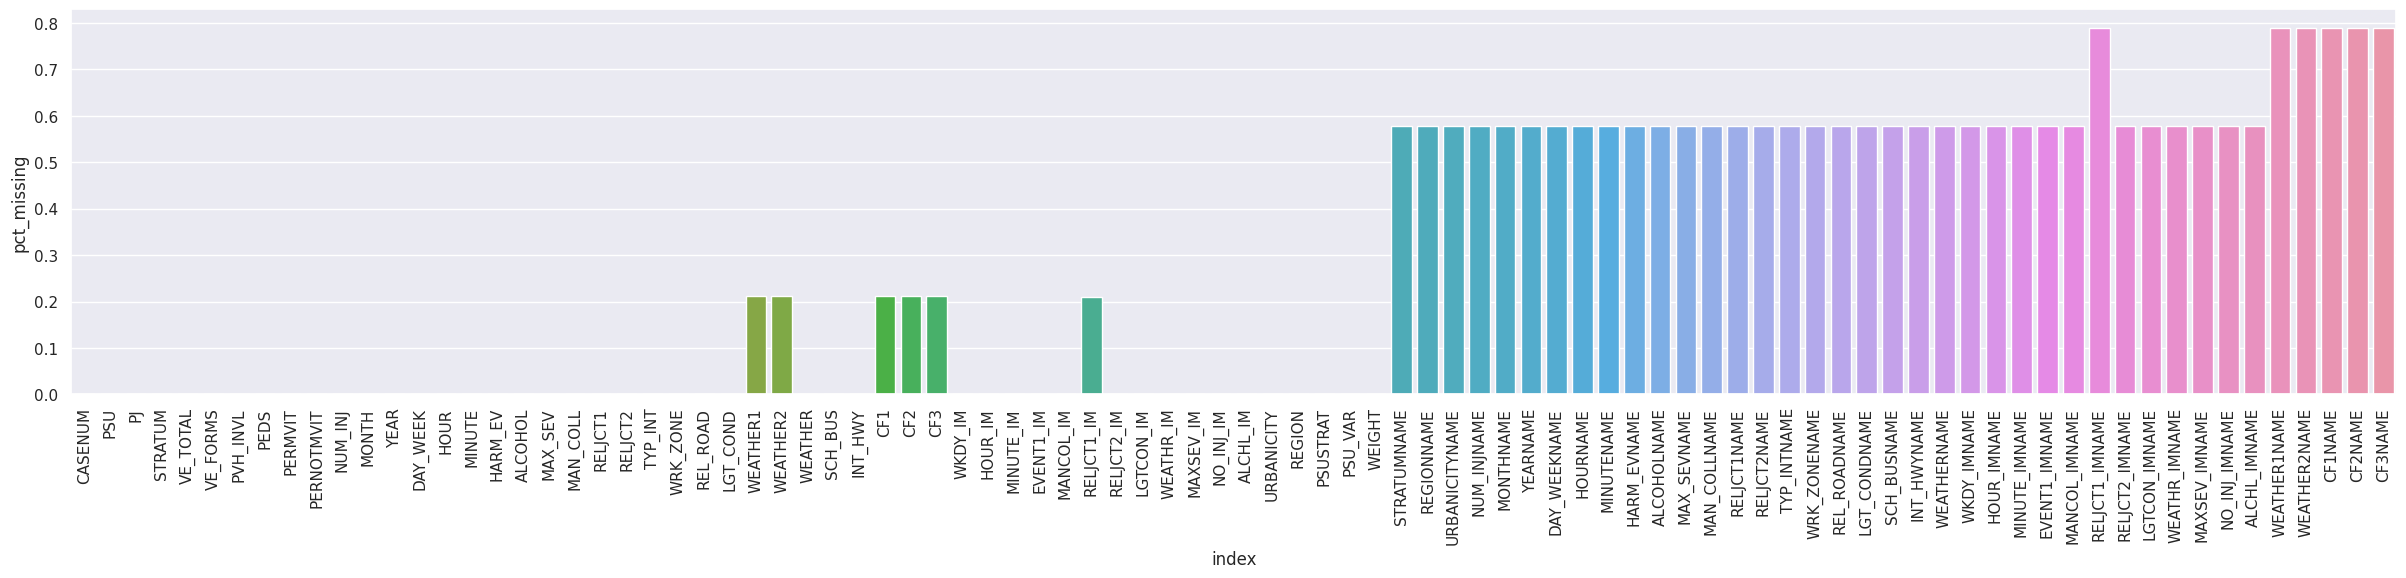

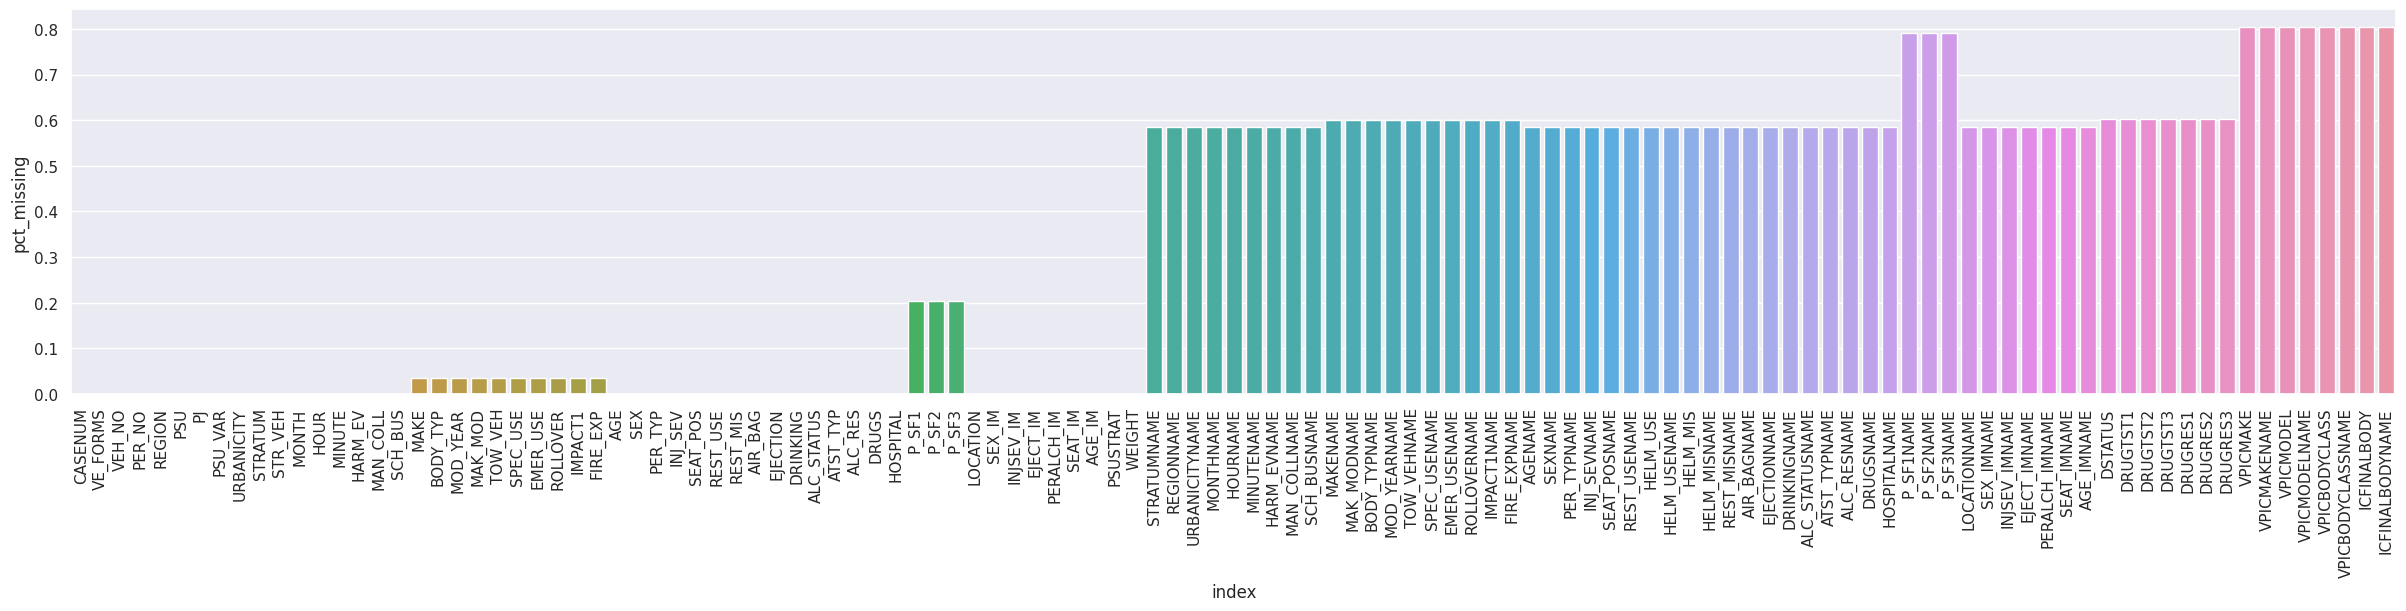

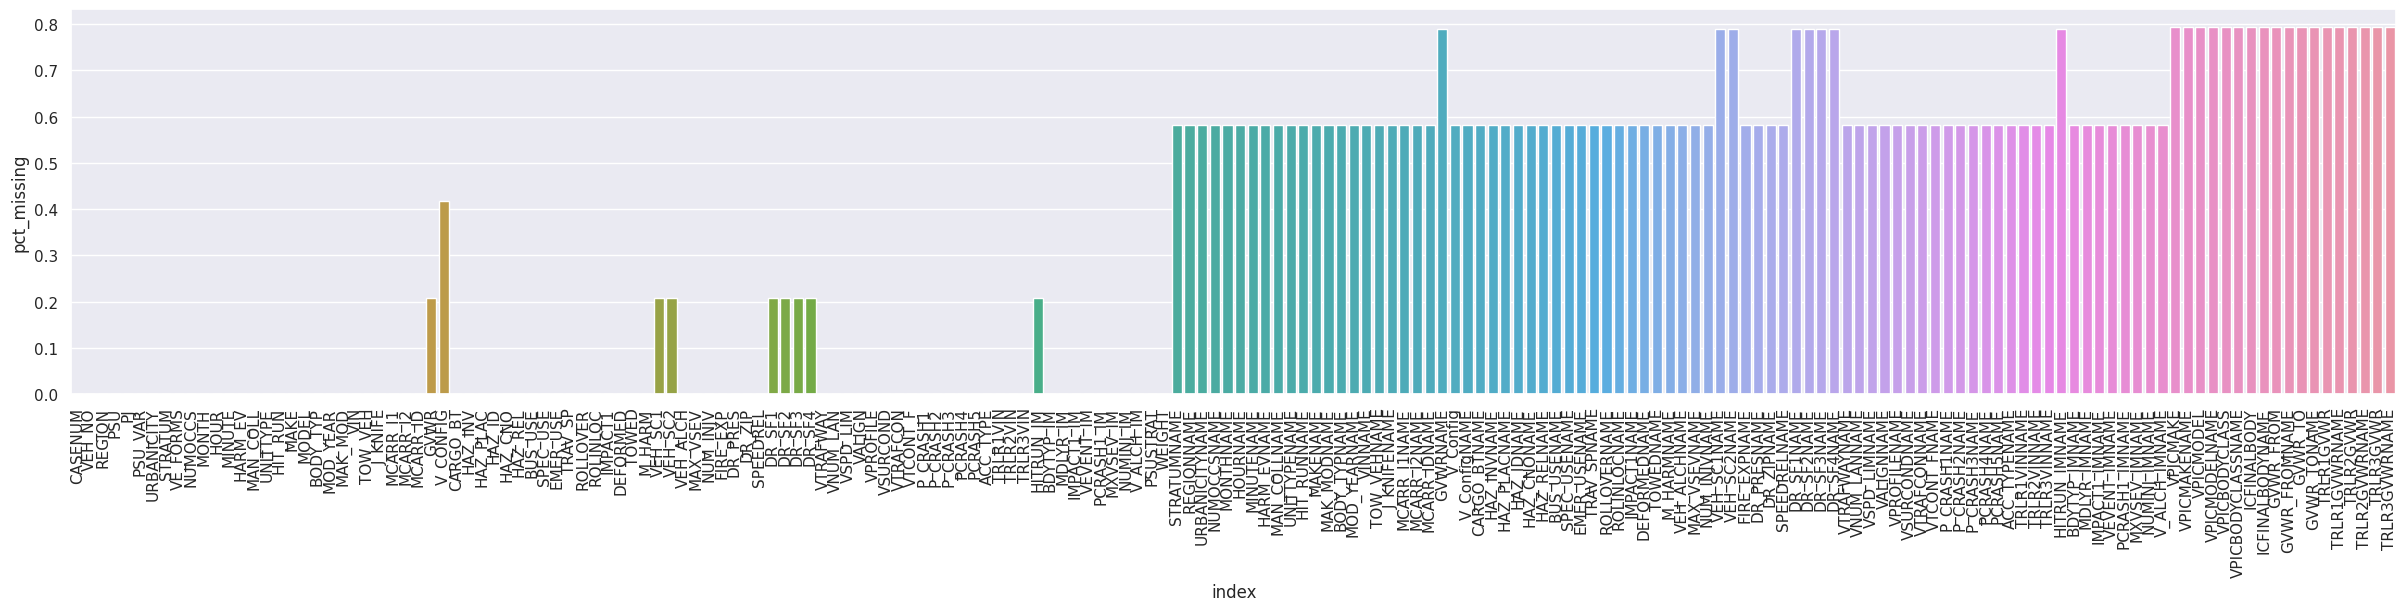

In [ ]:
# below the visual data confirmation
for df in [acc_df, pers_df, veh_df]:
  plot_missing_data(df)

In [ ]:
pers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644274 entries, 0 to 131961
Columns: 117 entries, CASENUM to ICFINALBODYNAME
dtypes: float64(27), int64(40), object(50)
memory usage: 580.0+ MB


In [ ]:
pers_df.describe()

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,DRUGTST1,DRUGTST2,DRUGTST3,DRUGRES1,DRUGRES2,DRUGRES3,VPICMAKE,VPICMODEL,VPICBODYCLASS,ICFINALBODY
count,6.442740e+05,644274.000000,644274.000000,644274.000000,644274.000000,644274.000000,644274.000000,644274.000000,644274.000000,644274.000000,...,256672.000000,256672.000000,256672.0,256672.000000,256672.0,256672.0,126885.000000,126885.000000,126885.000000,126885.000000
mean,2.018052e+11,1.980185,1.473857,1.391838,2.759343,47.387633,1675.640296,51.262874,1.218076,7.155729,...,1.021136,0.000035,0.0,23.768023,0.0,0.0,3379.879812,14499.996375,72.512795,1.074146
std,1.412826e+08,0.741893,0.709217,0.936231,0.869674,19.603283,1364.964969,31.964825,0.412940,2.442053,...,2.261444,0.014370,0.0,94.812818,0.0,0.0,16567.825719,30947.951081,218.751365,28.406484
min,2.016000e+11,1.000000,0.000000,1.000000,1.000000,10.000000,45.000000,10.000000,1.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,440.000000,1684.000000,1.000000,0.000000
25%,2.017002e+11,2.000000,1.000000,1.000000,2.000000,32.000000,500.000000,32.000000,1.000000,6.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,460.000000,1861.000000,7.000000,0.000000
50%,2.018009e+11,2.000000,1.000000,1.000000,3.000000,48.000000,1361.000000,48.000000,1.000000,8.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,474.000000,2150.000000,13.000000,0.000000
75%,2.019020e+11,2.000000,2.000000,2.000000,3.000000,63.000000,2792.000000,65.000000,1.000000,9.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,482.000000,3676.000000,15.000000,0.000000
max,2.020030e+11,15.000000,15.000000,75.000000,4.000000,83.000000,4153.000000,214.000000,2.000000,10.000000,...,9.000000,7.000000,0.0,999.000000,0.0,0.0,99999.000000,99999.000000,999.000000,999.000000


In [ ]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457314 entries, 0 to 94717
Columns: 184 entries, CASENUM to TRLR3GVWRNAME
dtypes: float64(21), int64(72), object(91)
memory usage: 645.5+ MB


In [ ]:
veh_df.describe()

,CASENUM,VEH_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_FORMS,NUMOCCS,...,MDLYR_IMNAME,VPICMAKE,VPICMODEL,VPICBODYCLASS,ICFINALBODY,GVWR_FROM,GVWR_TO,TRLR1GVWR,TRLR2GVWR,TRLR3GVWR
count,4.573140e+05,457314.000000,457314.000000,457314.000000,457314.000000,457314.000000,457314.000000,457314.000000,457314.000000,457314.000000,...,191435.000000,94718.000000,94718.000000,94718.000000,94718.000000,94718.000000,94718.000000,94718.000000,94718.000000,94718.000000
mean,2.018066e+11,1.503689,2.752748,47.299072,1684.202054,51.022413,1.215021,7.361275,2.001321,5.931990,...,2010.954277,4205.012310,15609.813393,79.260098,0.888743,13.200564,13.342797,77.510304,77.018001,77.001109
std,1.410858e+08,0.656063,0.863899,19.562175,1366.266323,31.570668,0.410837,2.326154,0.730702,20.587099,...,6.688817,18713.657612,32150.095844,229.299998,24.594486,12.342912,12.335615,4.213374,0.734481,0.152573
min,2.016000e+11,1.000000,1.000000,10.000000,45.000000,10.000000,1.000000,2.000000,1.000000,0.000000,...,1931.000000,440.000000,1684.000000,1.000000,0.000000,11.000000,11.000000,0.000000,11.000000,77.000000
25%,2.017003e+11,1.000000,2.000000,32.000000,503.000000,32.000000,1.000000,6.000000,2.000000,1.000000,...,2006.000000,460.000000,1861.000000,7.000000,0.000000,11.000000,11.000000,77.000000,77.000000,77.000000
50%,2.018009e+11,1.000000,3.000000,47.000000,1361.000000,47.000000,1.000000,8.000000,2.000000,1.000000,...,2012.000000,474.000000,2208.000000,13.000000,0.000000,11.000000,11.000000,77.000000,77.000000,77.000000
75%,2.019020e+11,2.000000,3.000000,63.000000,2793.000000,65.000000,1.000000,9.000000,2.000000,2.000000,...,2016.000000,483.000000,4267.000000,60.000000,0.000000,11.000000,12.000000,77.000000,77.000000,77.000000
max,2.020030e+11,15.000000,4.000000,83.000000,4153.000000,214.000000,2.000000,10.000000,15.000000,99.000000,...,2021.000000,99999.000000,99999.000000,999.000000,999.000000,99.000000,99.000000,99.000000,98.000000,98.000000


In [ ]:
#Create datetime column based on year, month, day, hour column
grouped_time = acc_df.groupby(['YEAR', 'MONTH'])[['CASENUM']].count()

## Multivariate Data Analysis

<Axes: xlabel='YEAR,MONTH'>

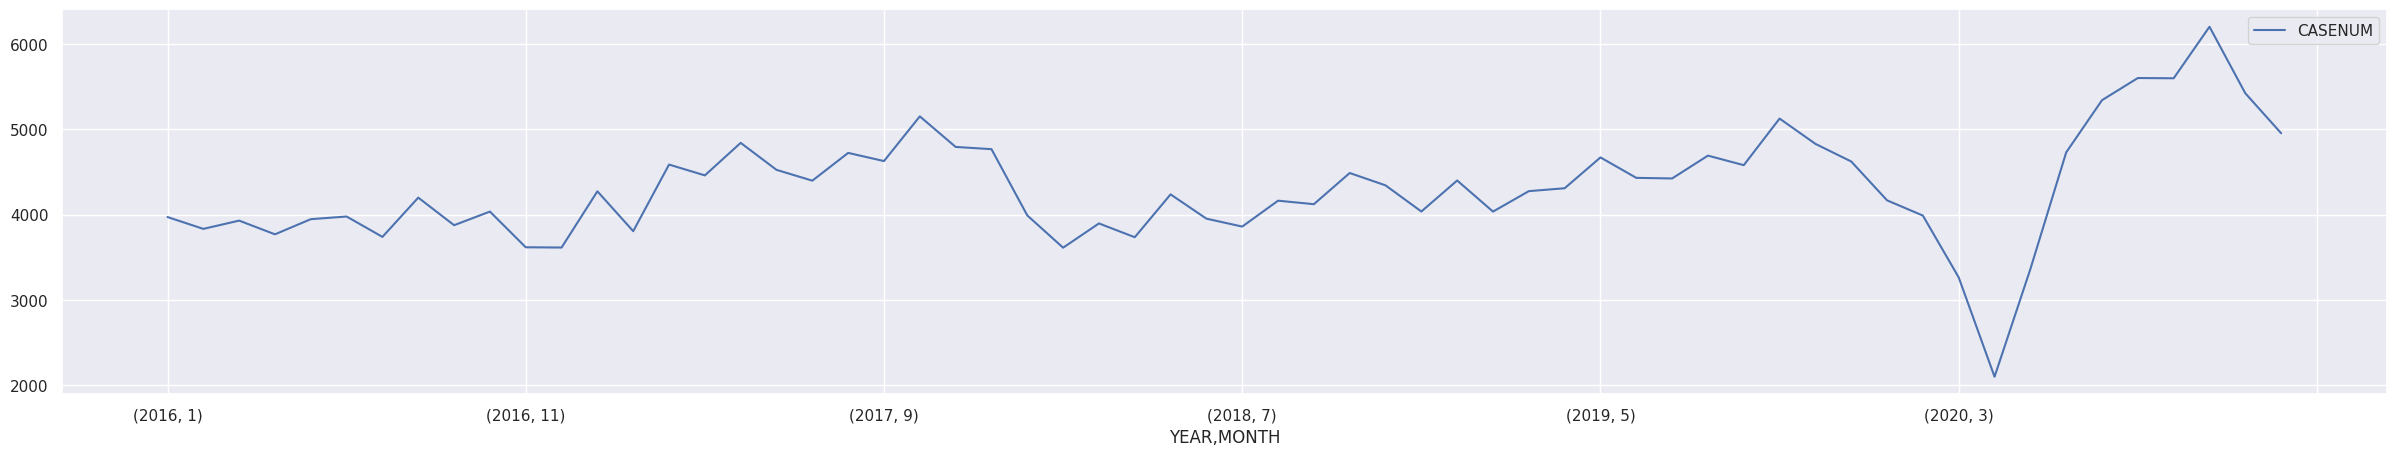

In [ ]:
grouped_time.plot()

Based on police reports values in stratum column (on a scale 1 to 9) were given to all observed accidents. A scale from 1 to 5 was assigned to car accidents which lead to minimum one person death or disability.

In [7]:
acc_df['IS_FATAL'] = acc_df['STRATUM'] <= 5

In [8]:
# calculate the count of mortal occurrences in all cases
acc_df.groupby(['IS_FATAL'])[['CASENUM']].count()

,CASENUM
IS_FATAL,
False,200213
True,58864


Based on the results demonstrated above the conclusion will be that the dataset is unbalanced.

IS_FATAL
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
dtype: object

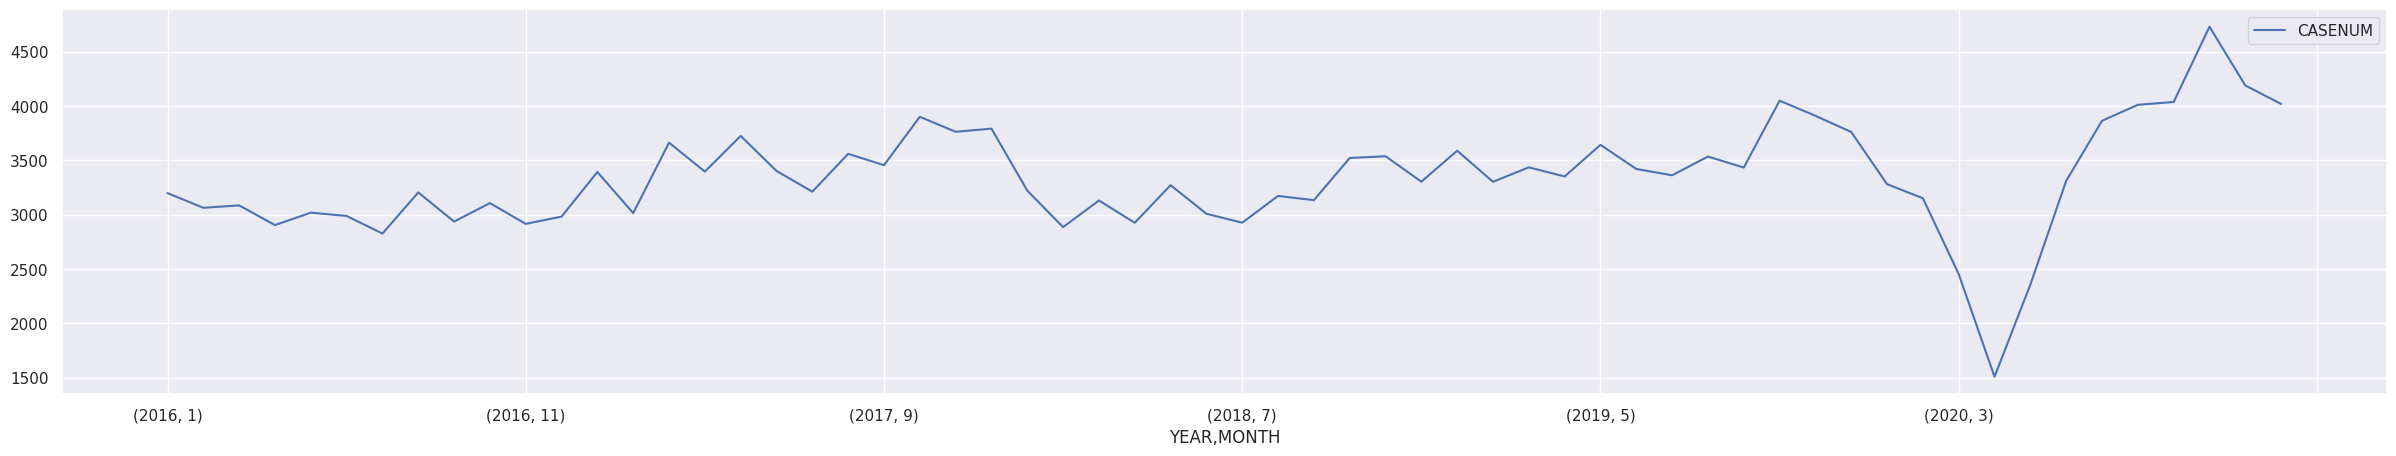

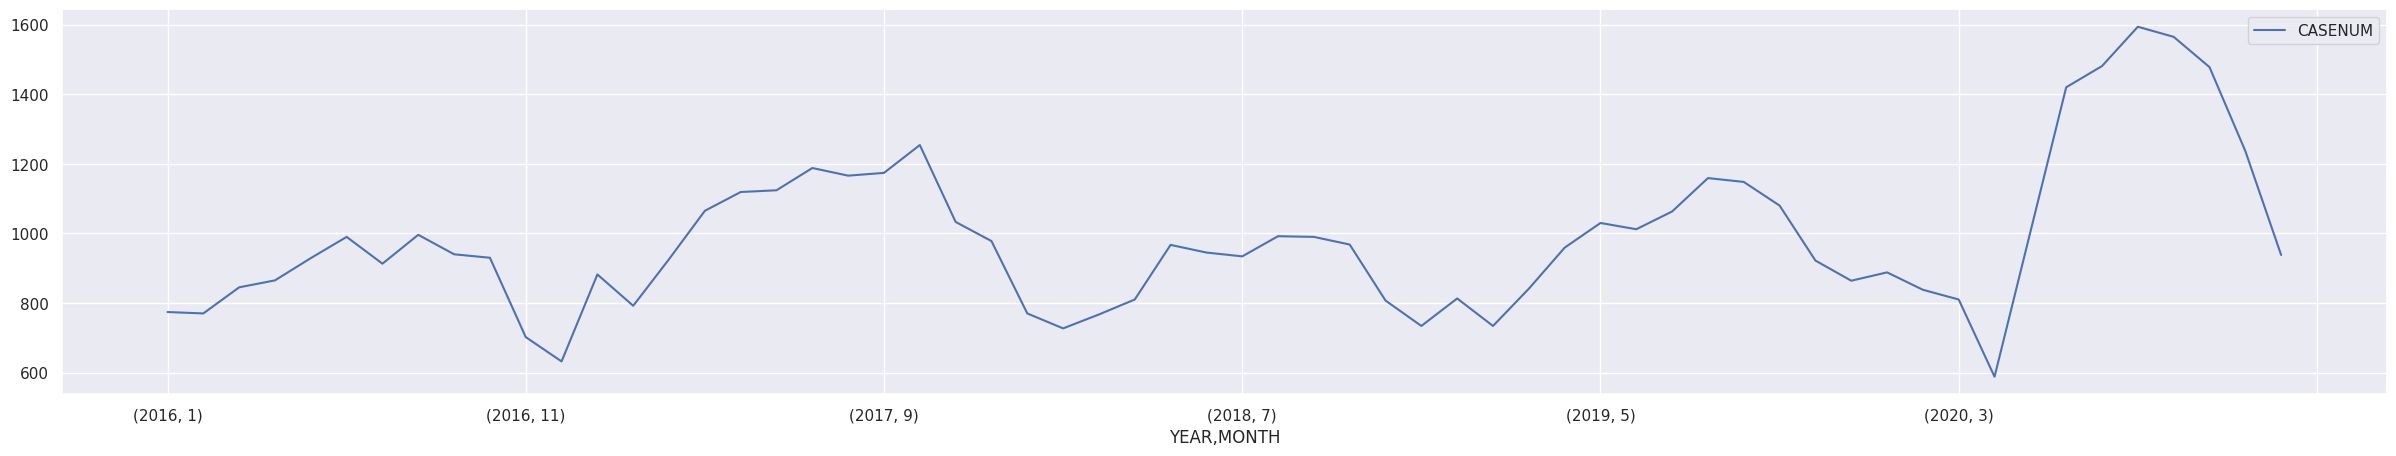

In [ ]:
# group and plot the number of cases by year, month, and fatal/non-fatal status
acc_df.groupby(['YEAR', 'MONTH', 'IS_FATAL'])[['CASENUM']].count().reset_index('IS_FATAL').groupby('IS_FATAL').plot()

<Axes: xlabel='YEAR', ylabel='CASENUM'>

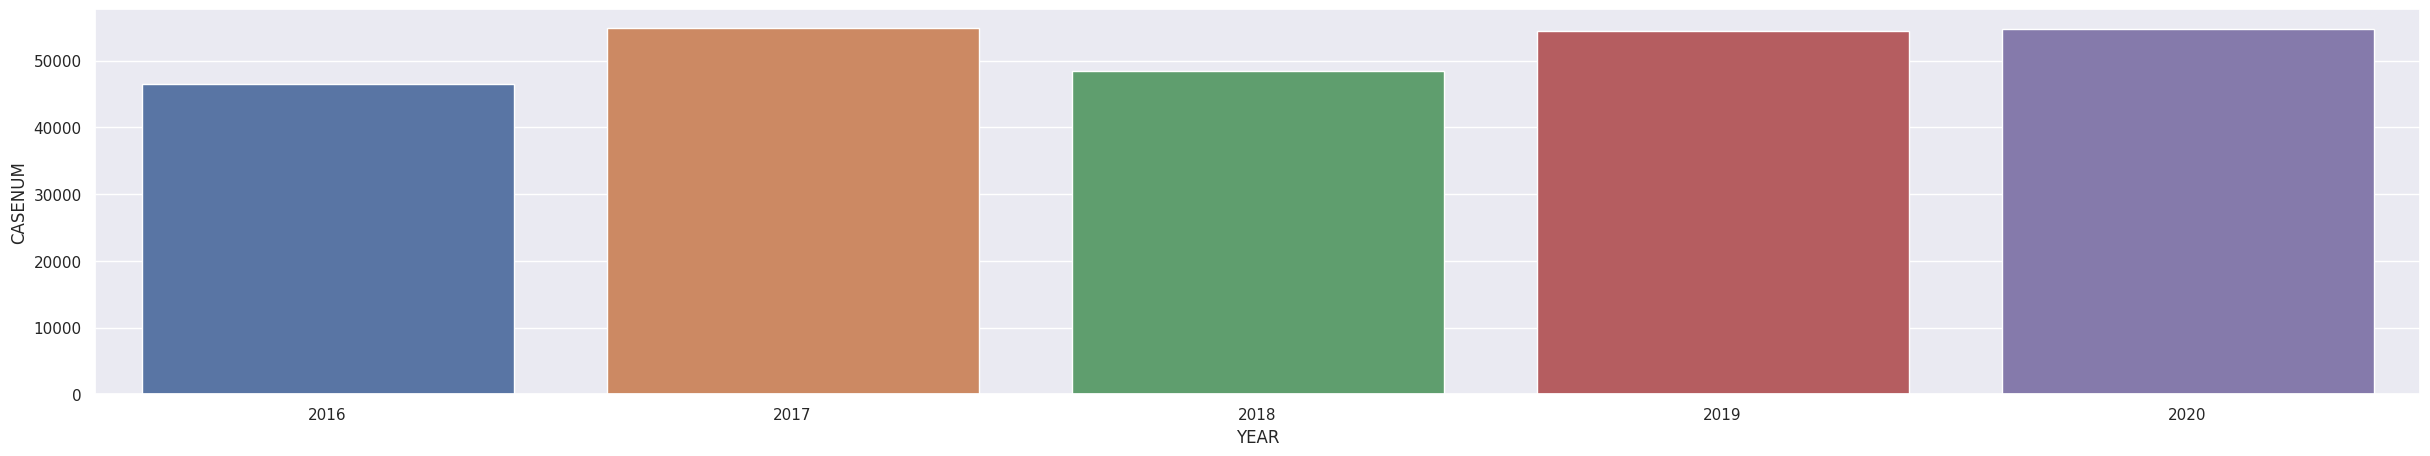

In [ ]:
# group and plot the number of cases by year
grouped_accidents = acc_df.groupby('YEAR')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'YEAR', y = 'CASENUM')

<Axes: xlabel='YEAR', ylabel='IS_FATAL'>

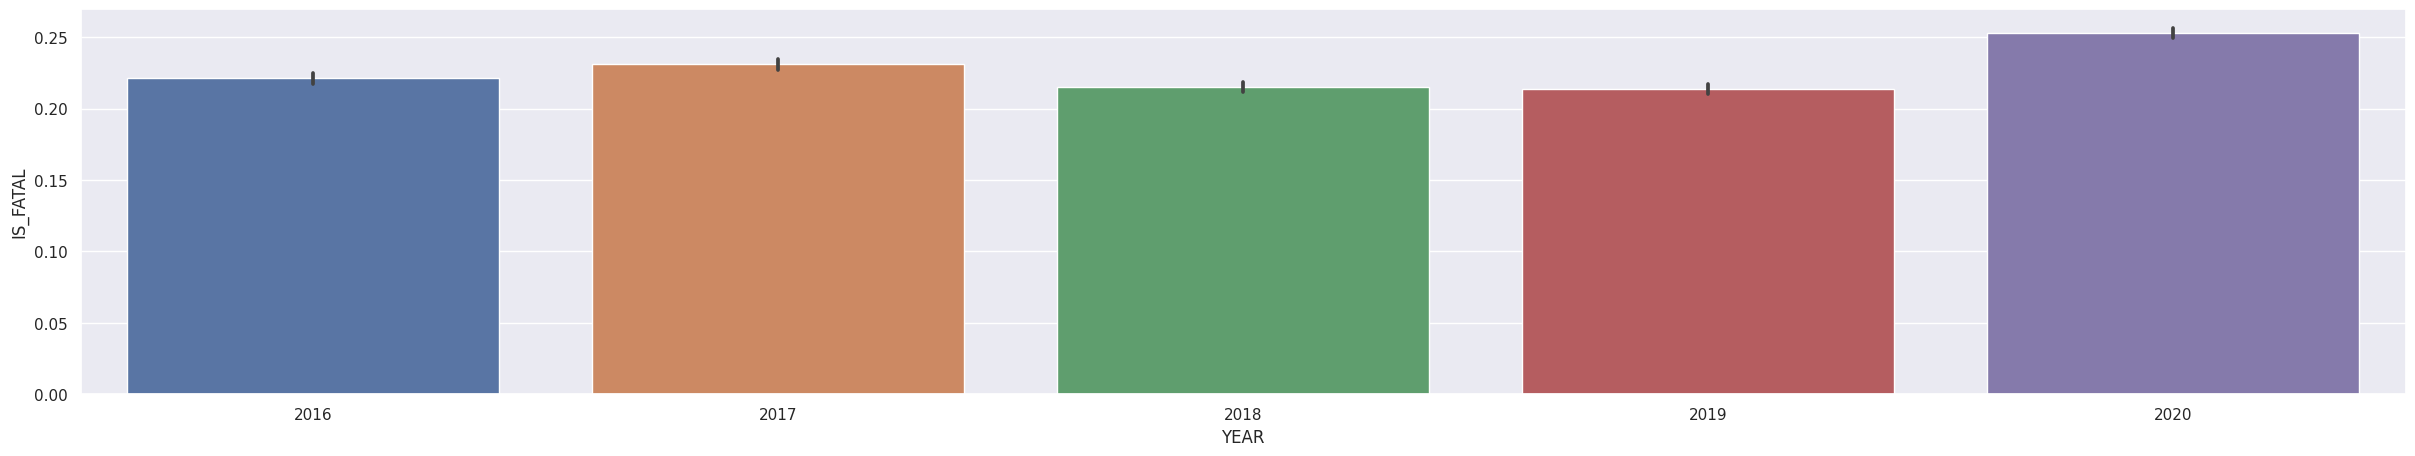

In [ ]:
# group and plot the percentage of cases by year and fatal status
sns.barplot(data=acc_df, x='YEAR', y='IS_FATAL')

IS_FATAL
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
dtype: object

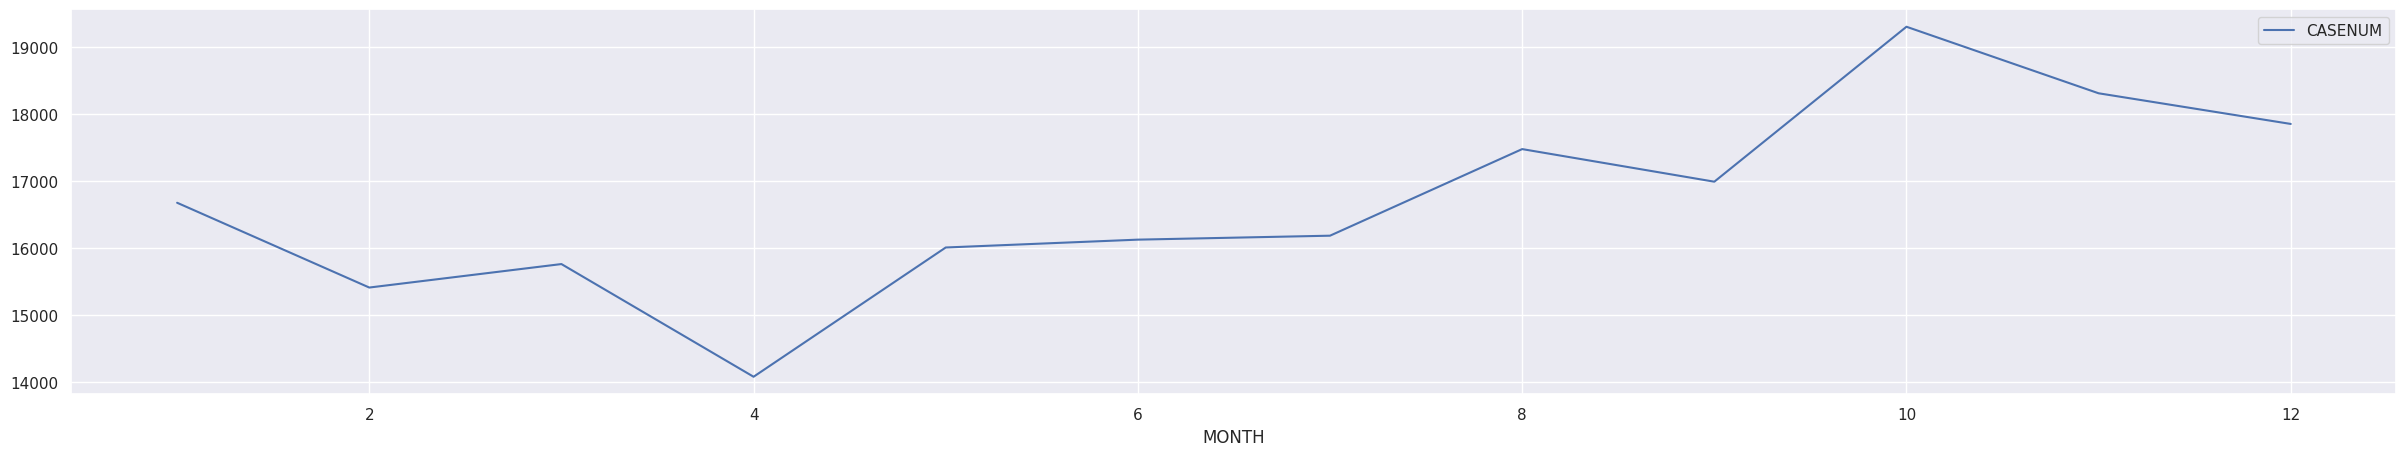

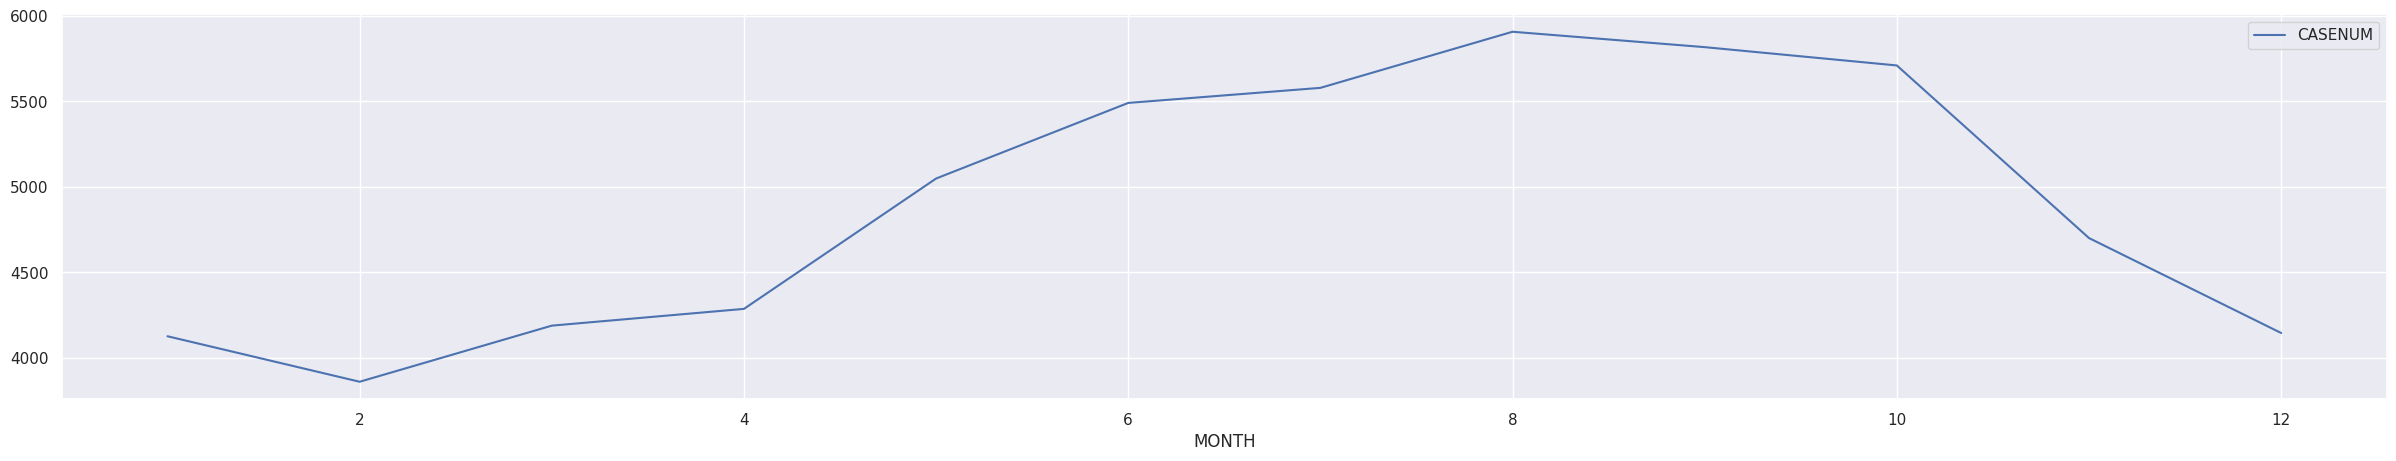

In [ ]:
acc_df.groupby(['MONTH', 'IS_FATAL'])[['CASENUM']].count().reset_index('IS_FATAL').groupby('IS_FATAL').plot()

<Axes: xlabel='MONTH', ylabel='CASENUM'>

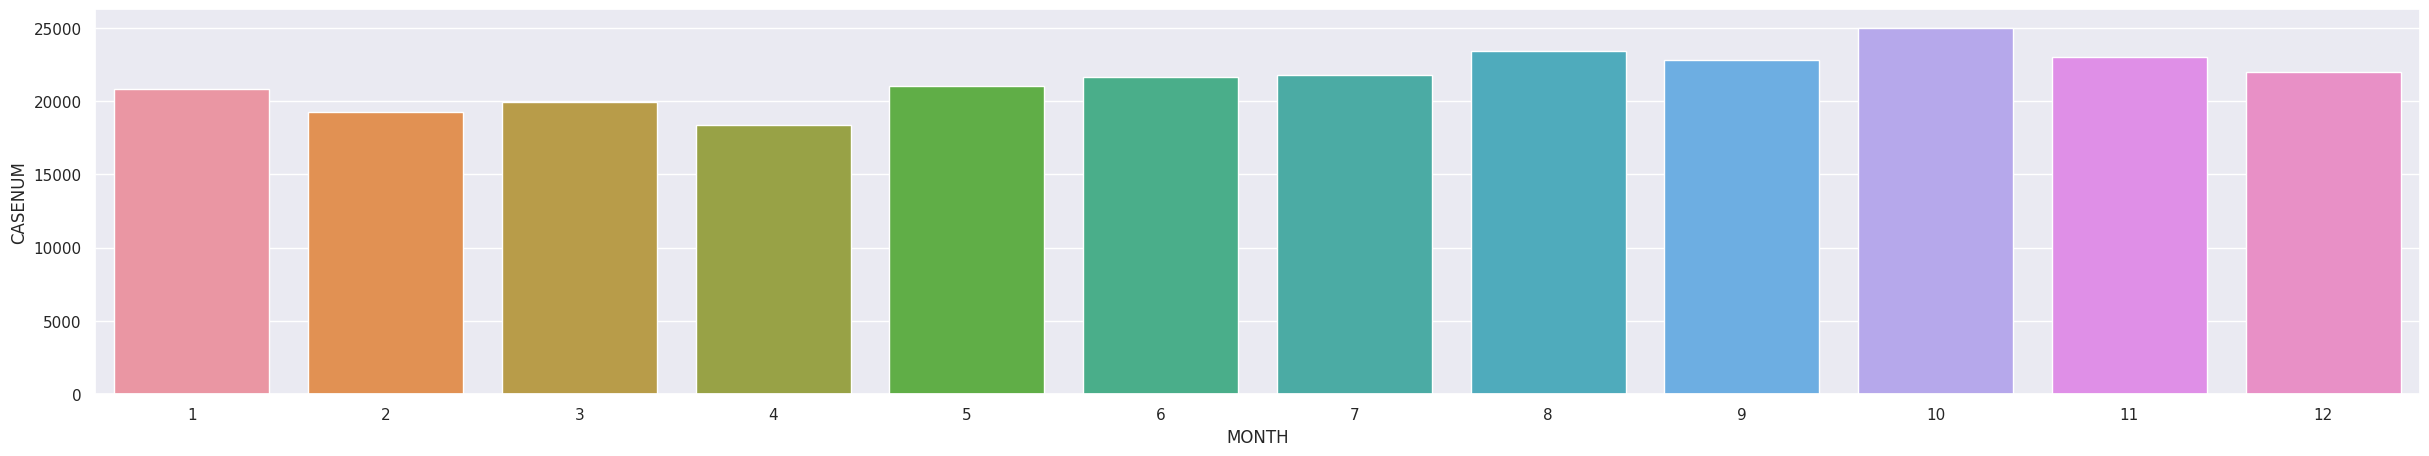

In [ ]:
# group and plot the number of cases by month
grouped_accidents = acc_df.groupby('MONTH')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'MONTH', y = 'CASENUM')

<Axes: xlabel='MONTH'>

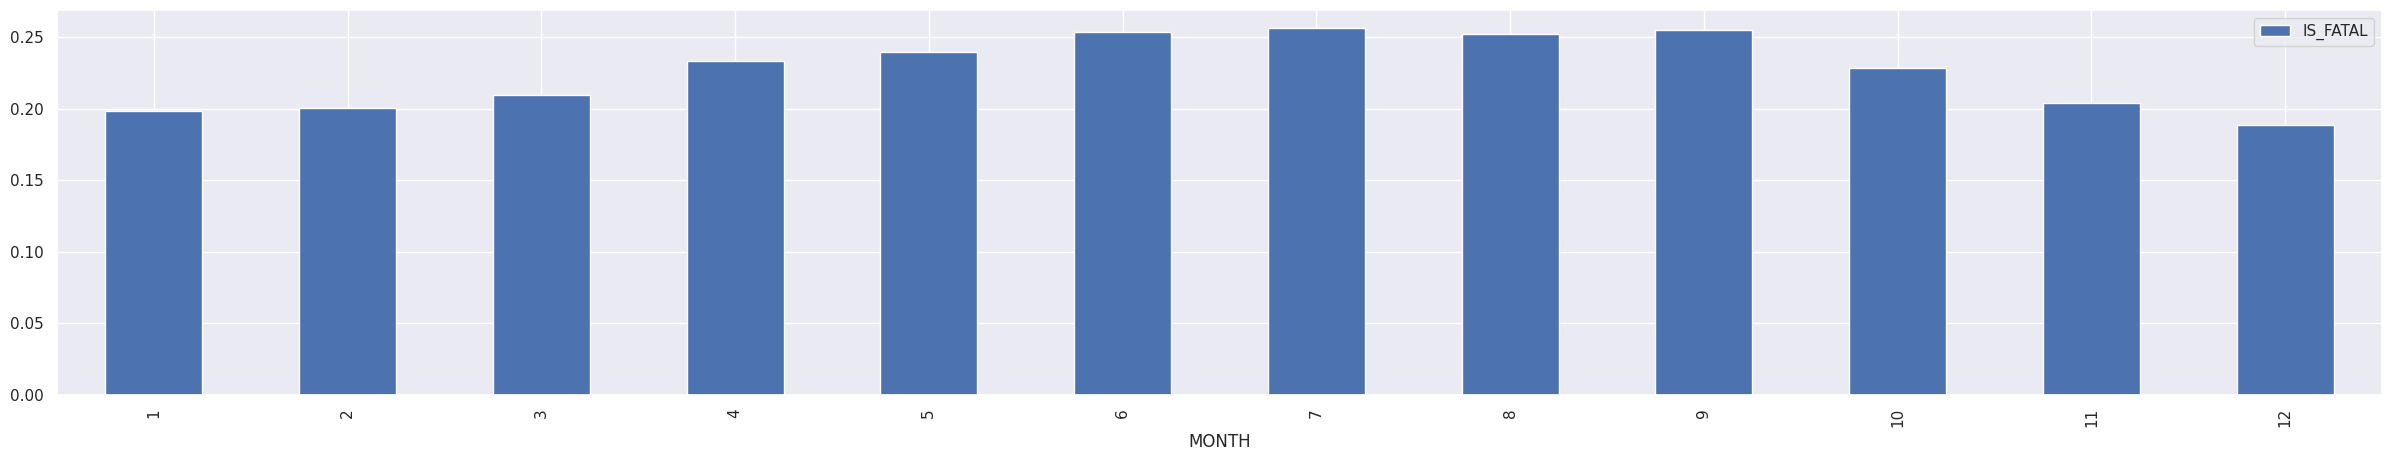

In [ ]:
# group and plot the percentage of cases by month and fatal status
acc_df.groupby('MONTH')[['IS_FATAL']].mean().plot.bar()

<Axes: xlabel='MONTH', ylabel='IS_FATAL'>

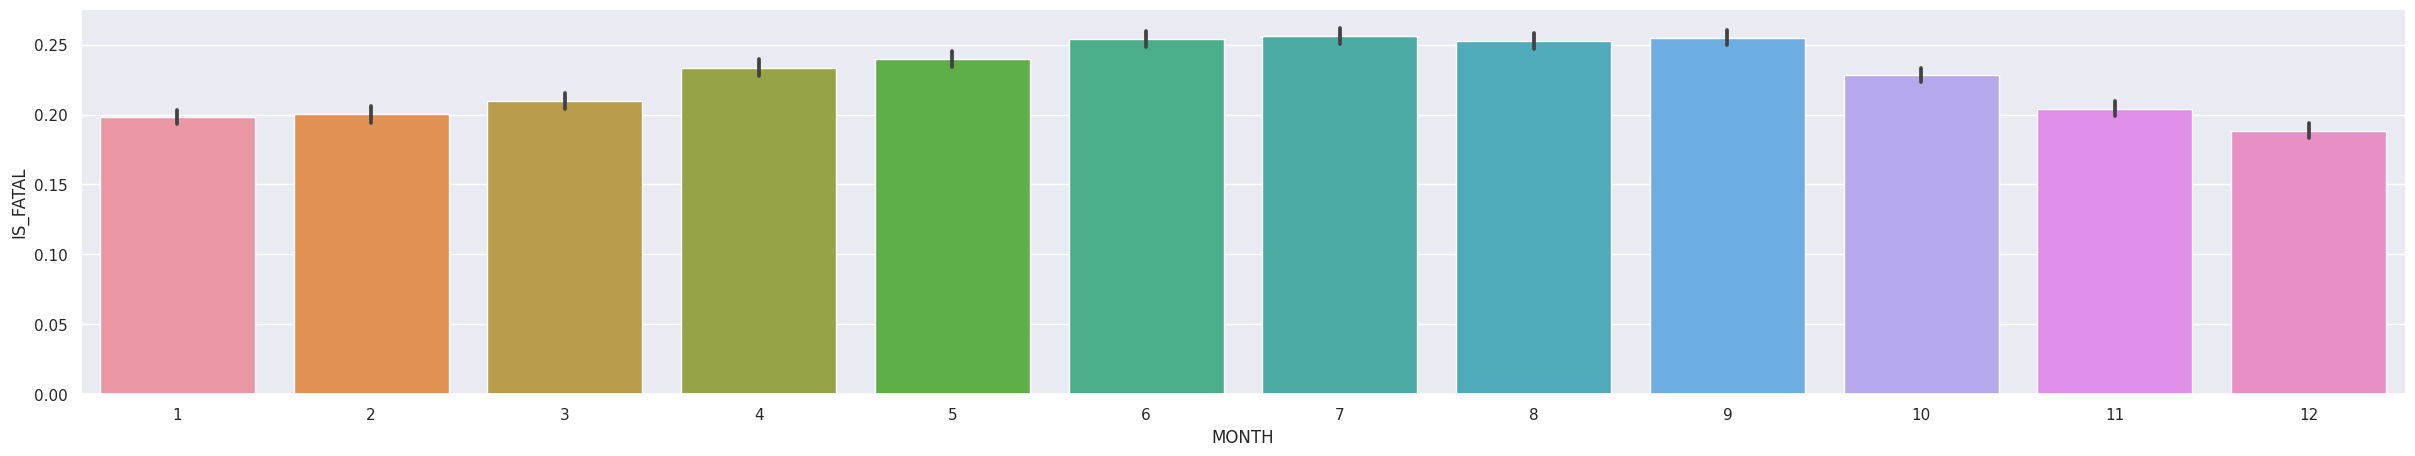

In [ ]:
sns.barplot(data = acc_df, x = 'MONTH', y = 'IS_FATAL')

In [ ]:
# define a function to assign seasons based on the month
def naming_seasons(month):
    if month in [3, 4, 5]:
        return 'SPRING'
    elif month in [6, 7, 8]:
        return 'SUMMER'
    elif month in [9, 10, 11]:
        return 'AUTUMN'
    else:
        return 'WINTER'

In [ ]:
acc_df['SEASON'] = acc_df['MONTH'].apply(naming_seasons)

<Axes: xlabel='SEASON', ylabel='CASENUM'>

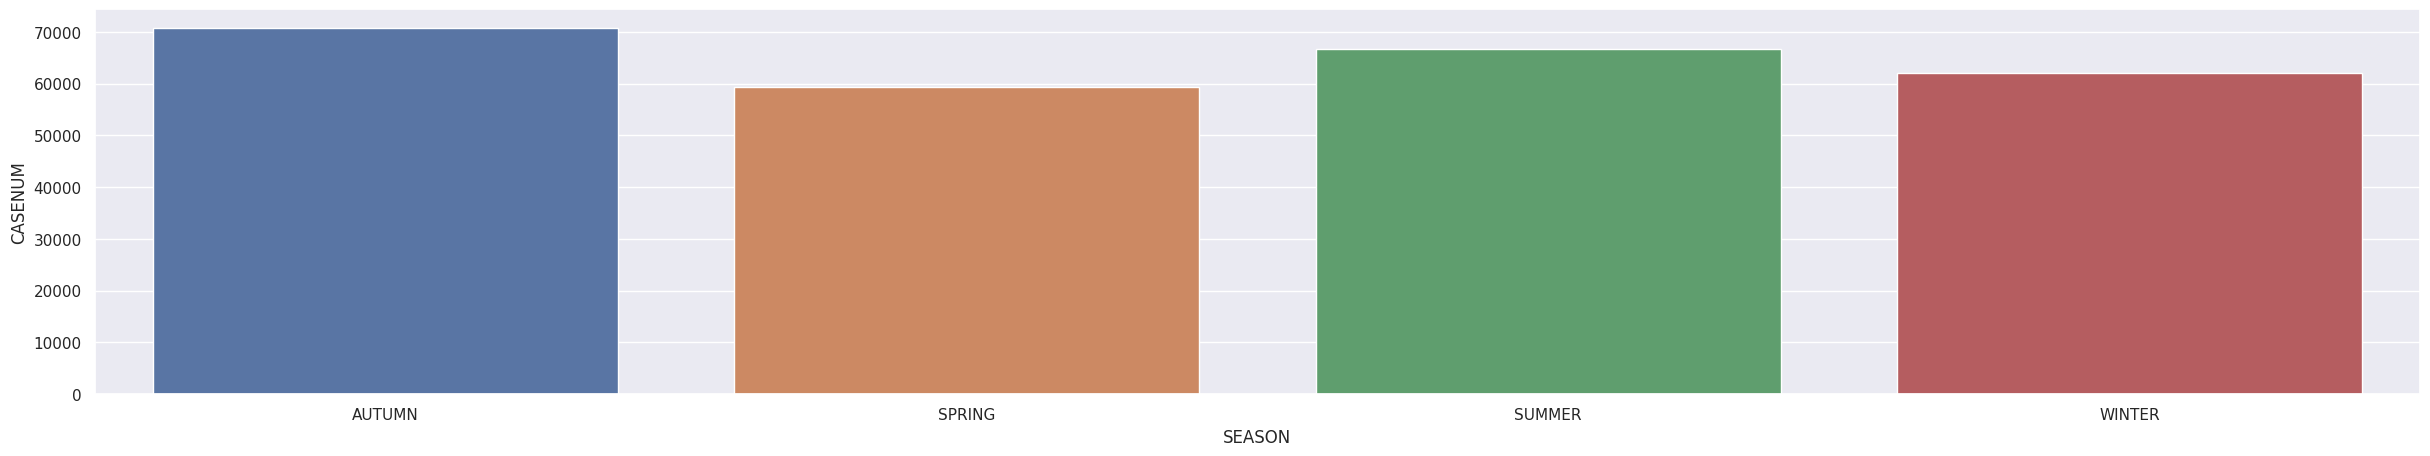

In [ ]:
# plot a bar chart showing the number of cases by season and with differentiating fatal/non-fatal status
grouped_accidents = acc_df.groupby('SEASON')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'SEASON', y = 'CASENUM')

<Axes: xlabel='SEASON', ylabel='IS_FATAL'>

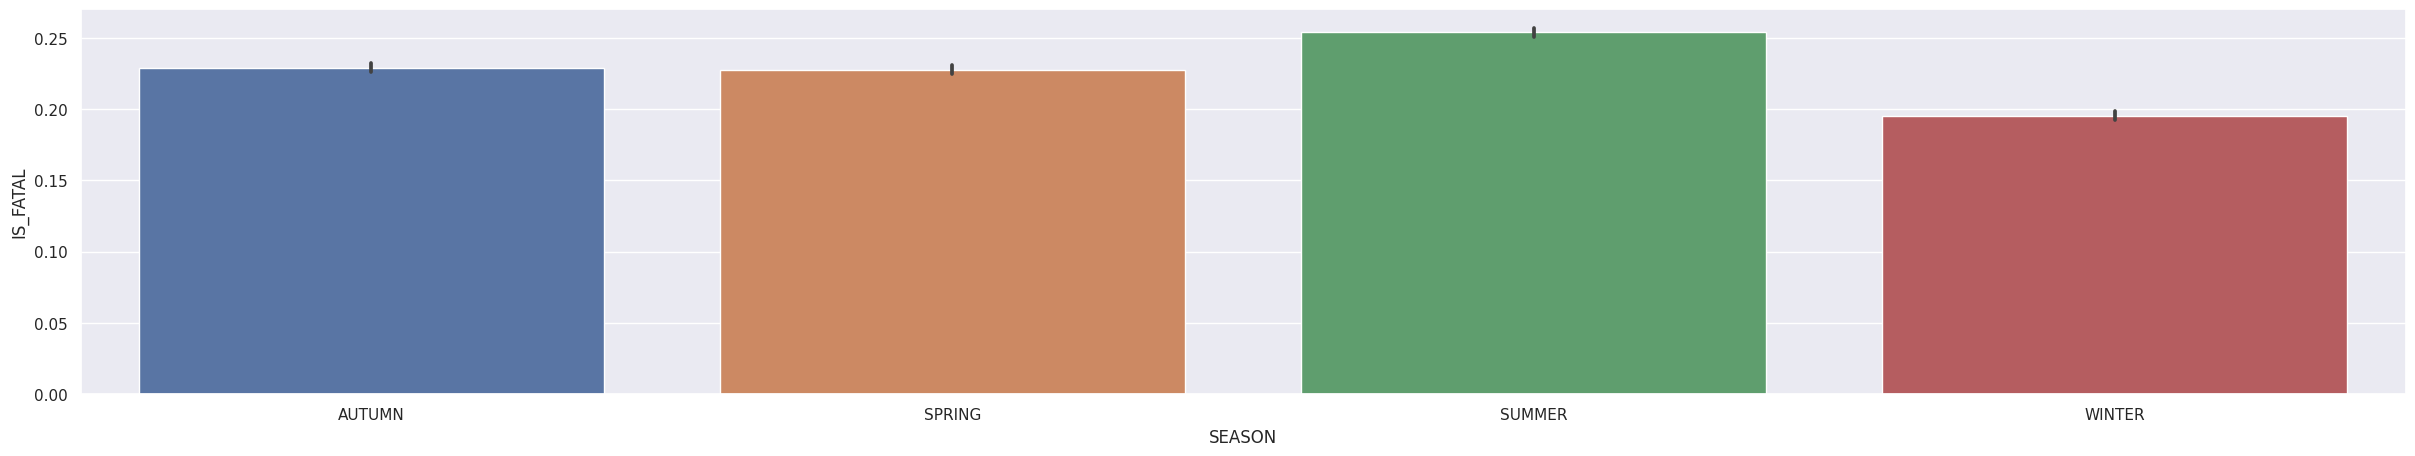

In [ ]:
# plot a bar chart showing the number of cases by season and fatal status
sns.barplot(data = acc_df, x = 'SEASON', y = 'IS_FATAL', order=sorted(acc_df['SEASON'].unique()))

<Axes: xlabel='HOUR', ylabel='CASENUM'>

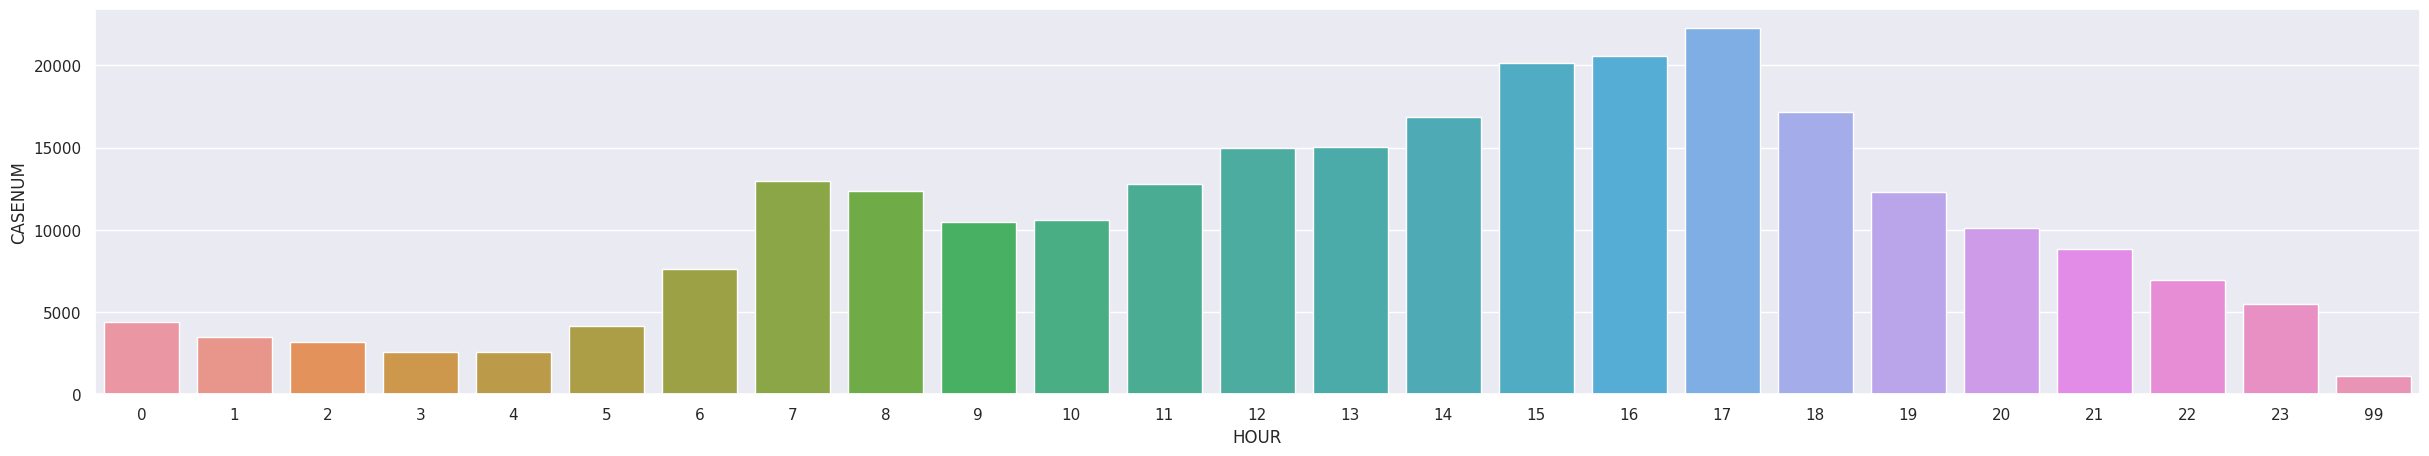

In [ ]:
# plot a bar chart showing the number of cases by hour  with differentiating fatal/non-fatal status
grouped_accidents = acc_df.groupby('HOUR')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'HOUR', y = 'CASENUM')

<Axes: xlabel='HOUR', ylabel='IS_FATAL'>

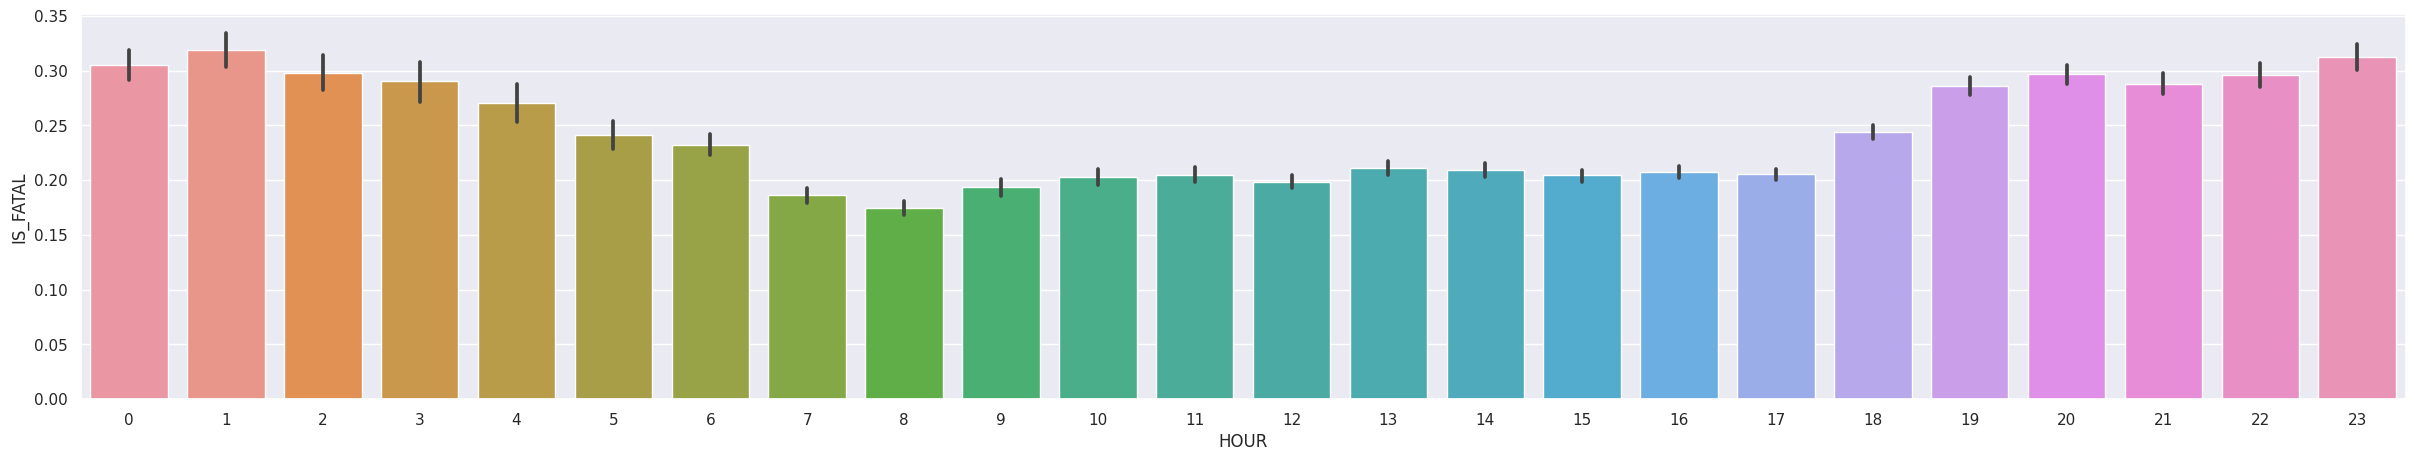

In [ ]:
# plot a bar chart showing the percentage of cases by season and fatal status
sns.barplot(data = acc_df, x = 'HOUR', y = 'IS_FATAL', order=list(range(0, 24)))

In [ ]:
#acc_df['WEATHER'] = acc_df['WEATHER'].replace([98, 99], None)

<Axes: xlabel='WEATHER_LABEL', ylabel='IS_FATAL'>

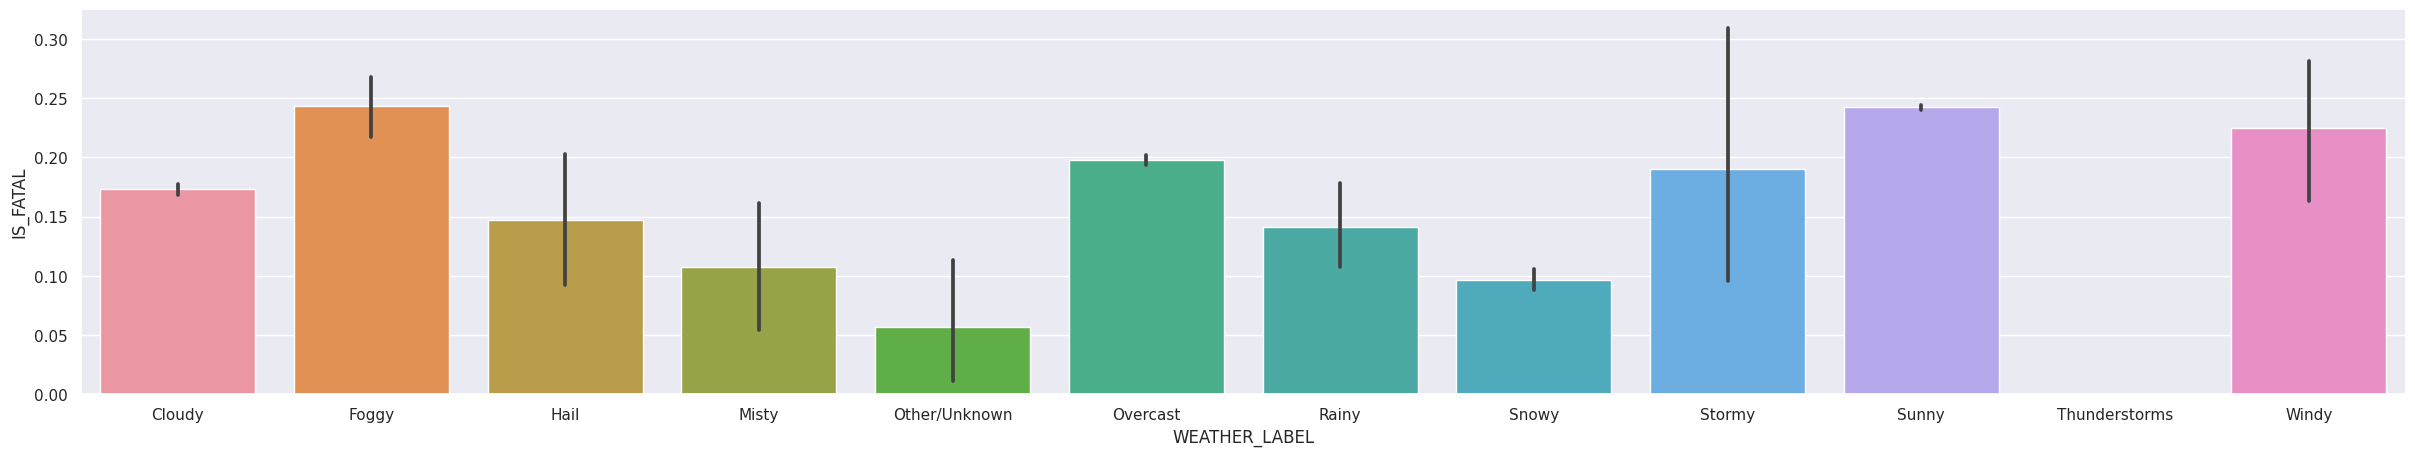

In [ ]:
# plot a bar chart showing the percentage of cases by weather and fatal status
weather_labels = {1: 'Sunny', 2: 'Cloudy',3: 'Rainy', 4: 'Snowy', 5: 'Foggy', 6: 'Windy', 7: 'Stormy', 8: 'Hail', 9: 'Thunderstorms', 10: 'Overcast', 11: 'Misty', 12: 'Other/Unknown'}
acc_df['WEATHER_LABEL'] = acc_df['WEATHER'].replace(weather_labels)

sns.barplot(data=acc_df, x='WEATHER_LABEL', y='IS_FATAL', order=sorted(weather_labels.values()))

<Axes: xlabel='ALCOHOL', ylabel='CASENUM'>

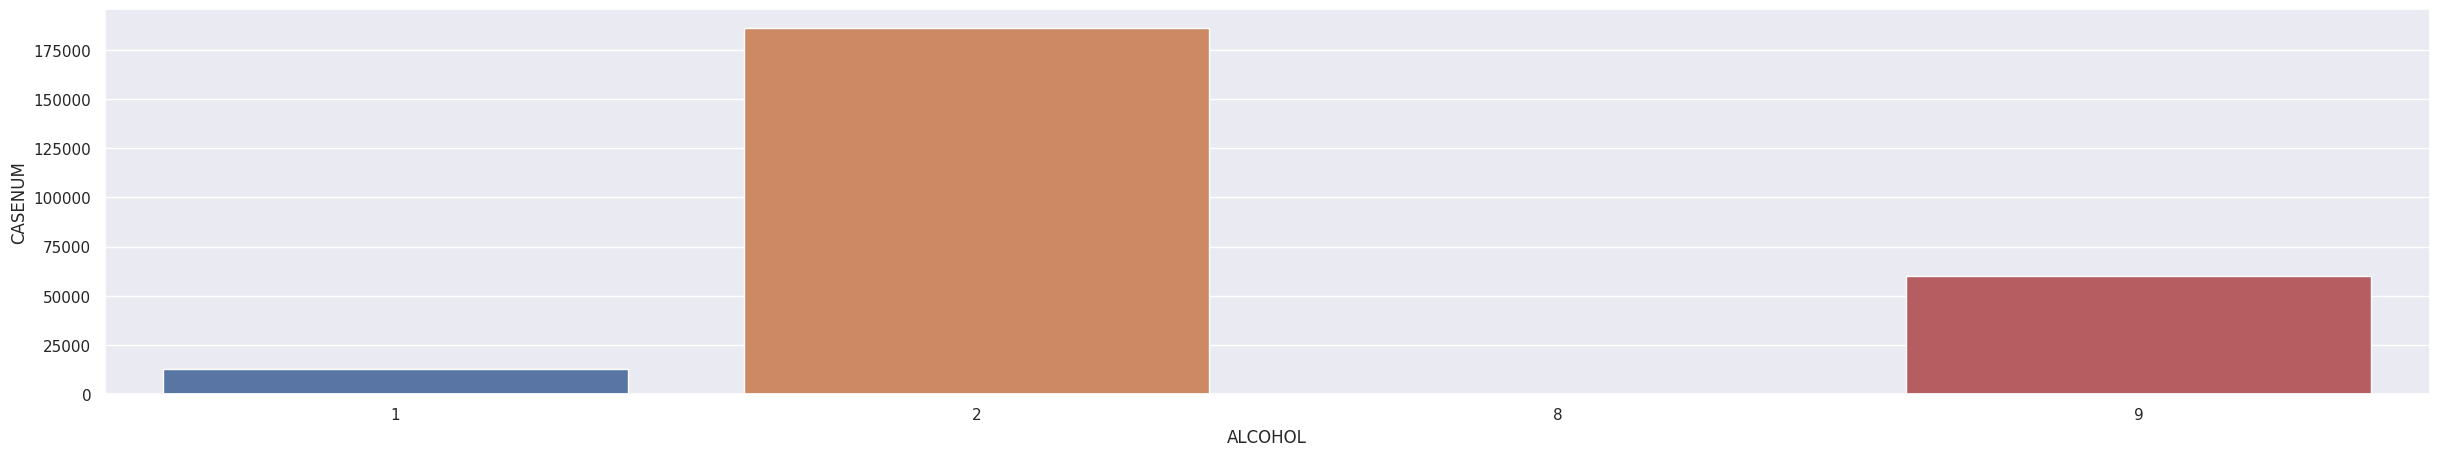

In [ ]:
# plot a bar chart showing the number of cases by alcohol and non-fatal/fatal status
grouped_accidents = acc_df.groupby('ALCOHOL')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'ALCOHOL', y = 'CASENUM')

<Axes: xlabel='ALCOHOL', ylabel='IS_FATAL'>

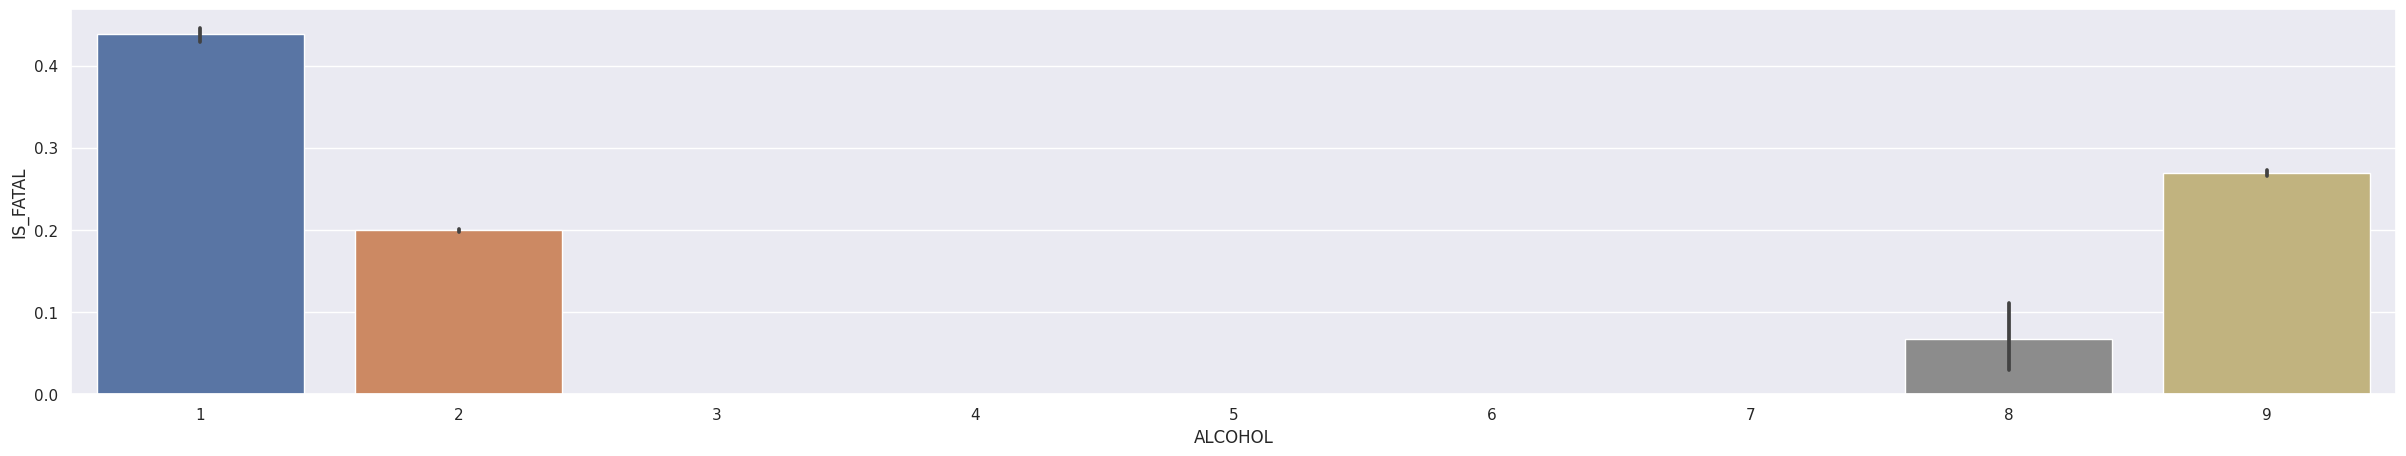

In [ ]:
# plot a bar chart showing the percentage of cases by alcohol and fatal status
sns.barplot(data = acc_df, x = 'ALCOHOL', y = 'IS_FATAL', order=list(range(1, 10)))

<Axes: xlabel='URBANICITY', ylabel='CASENUM'>

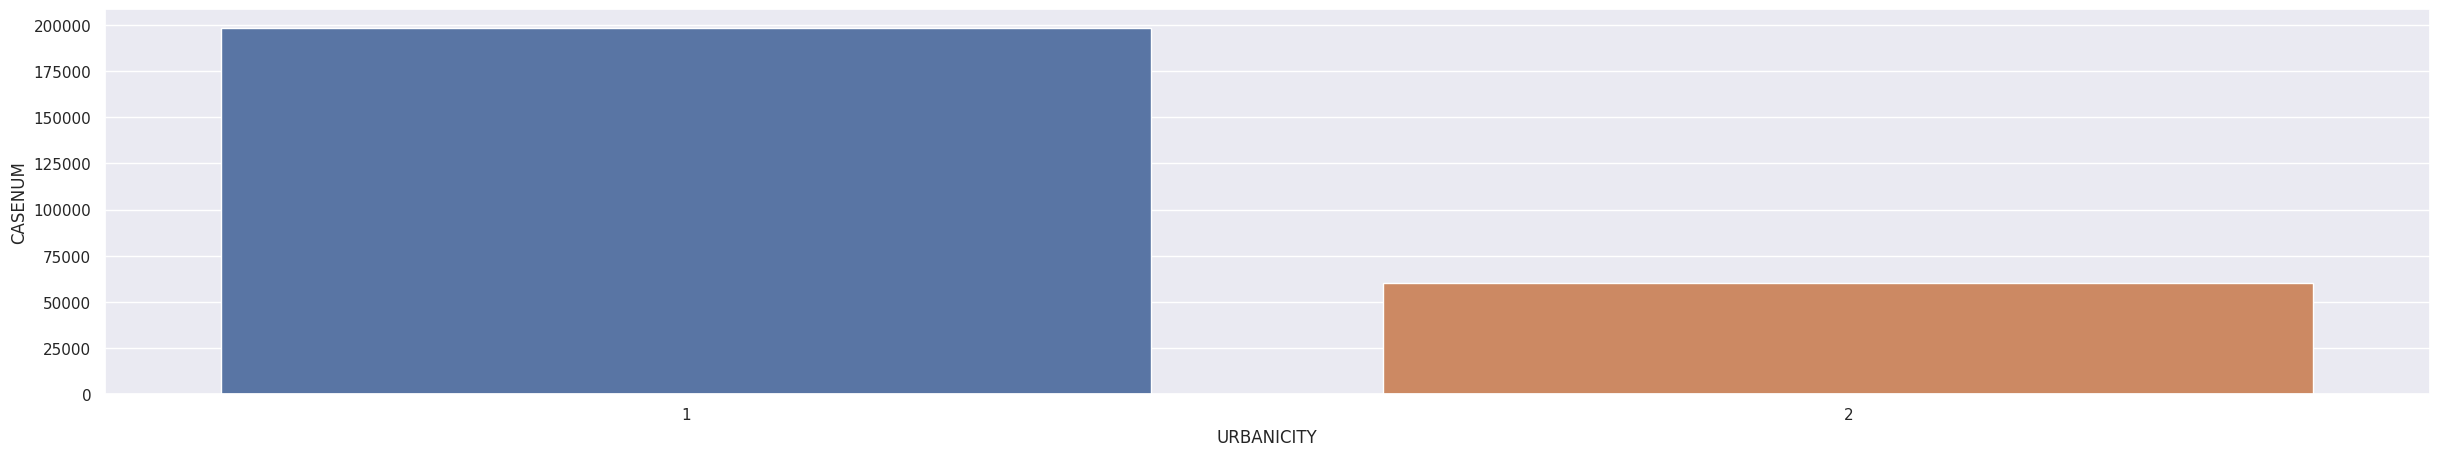

In [ ]:
# plot a bar chart showing the number of cases in the city or urban and non-fatal/fatal status
grouped_accidents = acc_df.groupby('URBANICITY')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'URBANICITY', y = 'CASENUM')

<Axes: xlabel='URBANICITY', ylabel='IS_FATAL'>

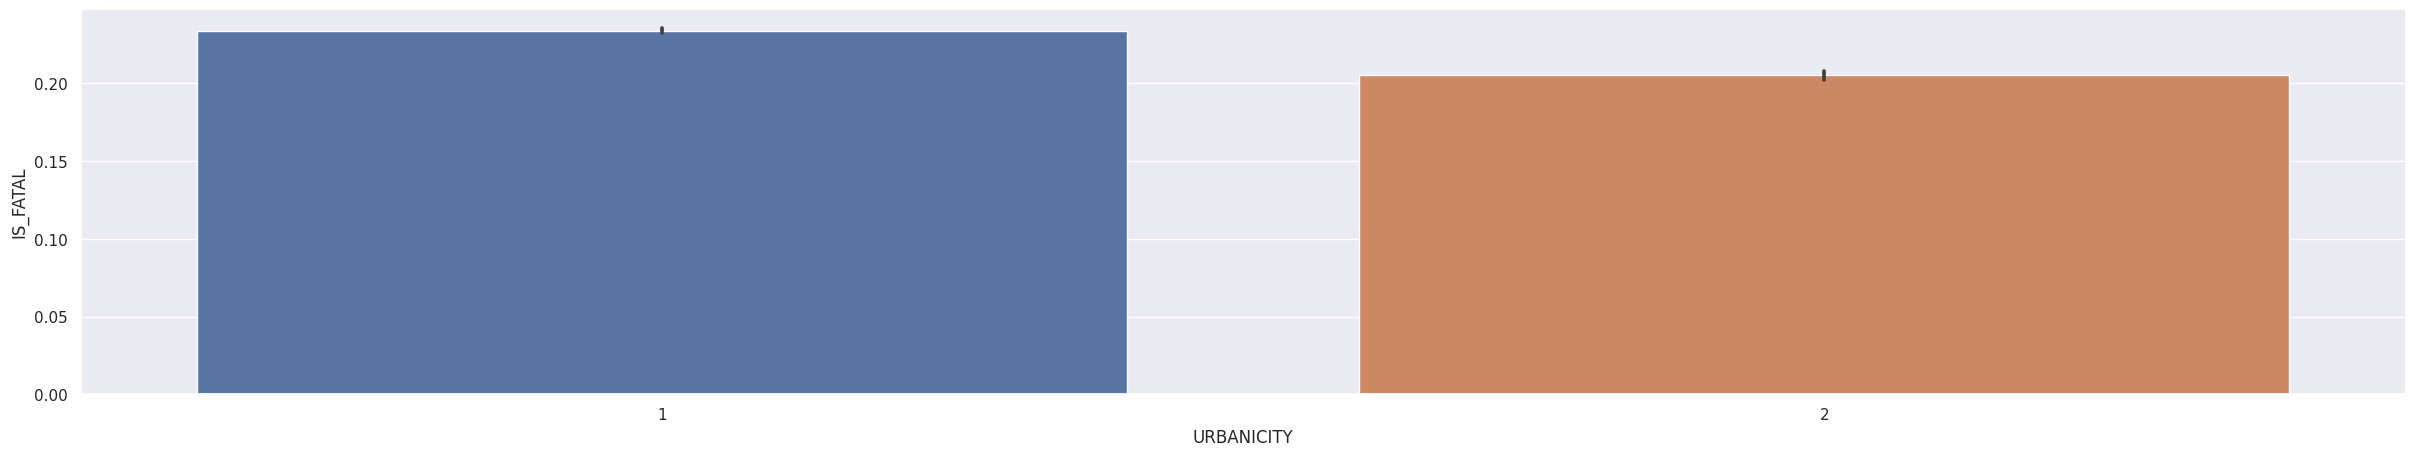

In [ ]:
# plot a bar chart showing the percentage of cases in the city or urban and fatal status
sns.barplot(data = acc_df, x = 'URBANICITY', y = 'IS_FATAL')

<Axes: xlabel='LGT_COND', ylabel='CASENUM'>

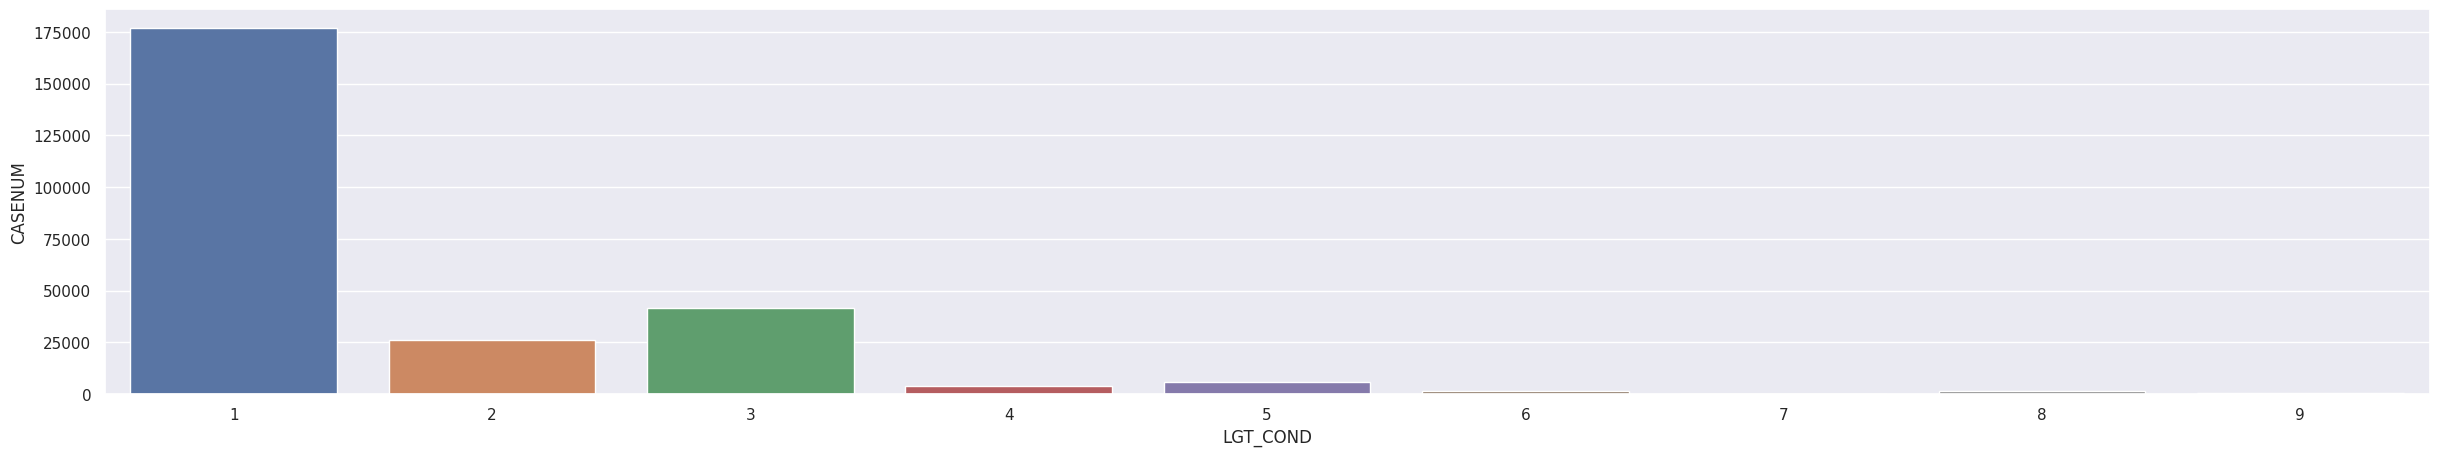

In [ ]:
# plot a bar chart showing the number of cases depend on light conditions and non-fatal/fatal status
grouped_accidents = acc_df.groupby('LGT_COND')['CASENUM'].count().reset_index()
sns.barplot(data=grouped_accidents, x = 'LGT_COND', y = 'CASENUM')

<Axes: xlabel='LGT_COND', ylabel='IS_FATAL'>

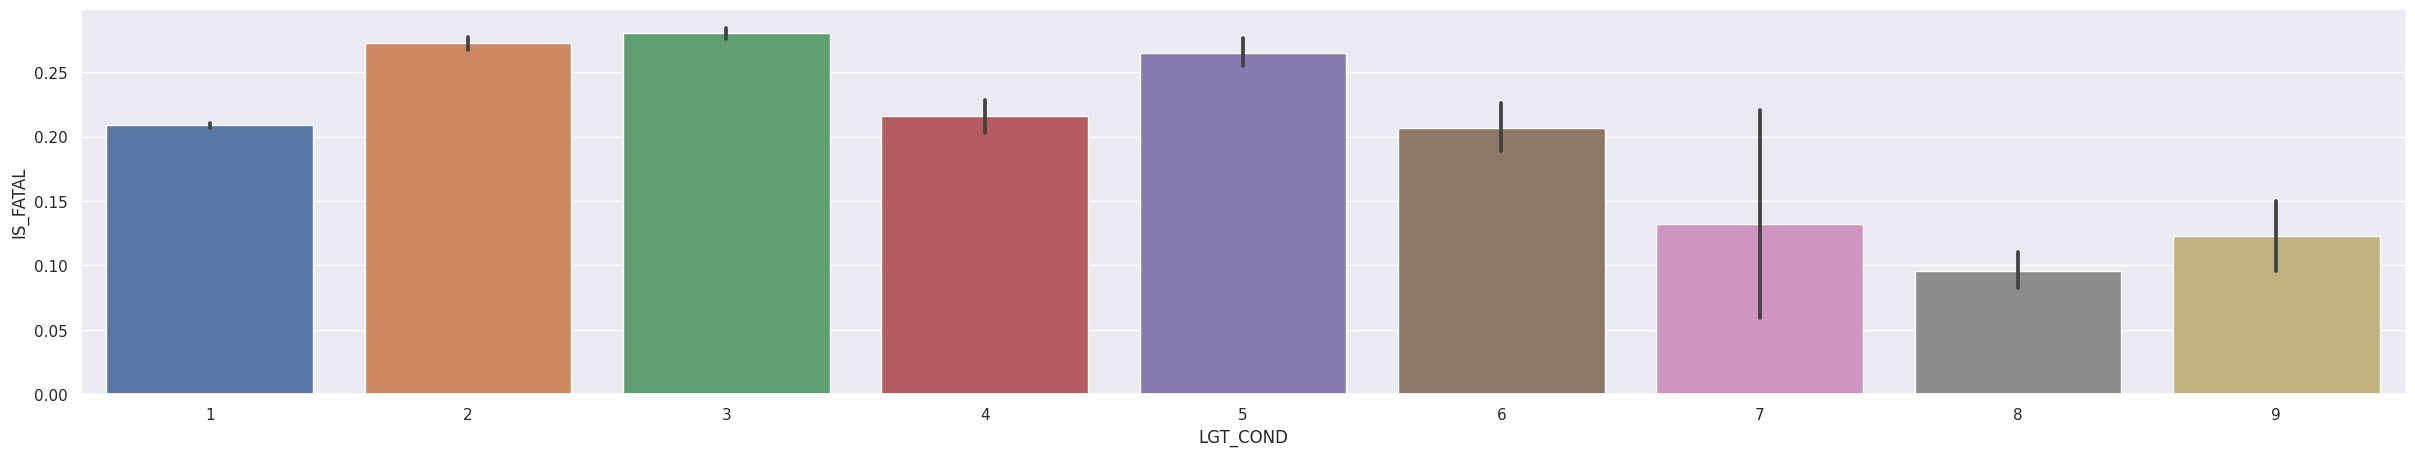

In [ ]:
# plot a bar chart showing the percentage of cases depend on light conditions and non-fatal/fatal status
sns.barplot(data = acc_df, x = 'LGT_COND', y = 'IS_FATAL')

## Modeling

In [9]:
# importing all necessary libraries to make a model
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
import gc
gc.collect()

0

In [11]:
# define the predictor variables and the target variable
X = acc_df.copy()
target_variable = 'IS_FATAL'

# assign the variables and split the data into two sets: training and test
X = X.drop([target_variable, 'STRATUM','STRATUMNAME','HARM_EVNAME','NUM_INJ','NUM_INJNAME','HARM_EV','MAXSEV_IMNAME','NO_INJ_IMNAME','CASENUM',
            'VE_TOTAL','VE_FORMS','MAXSEV_IM' ,'PEDS','PERNOTMVIT','MAX_SEV','NO_INJ_IM','NO_INJ_IM','WEIGHT','PSU','PJ','PSU_VAR','PVH_INVL','MAN_COLL','PSUSTRAT'] , axis =1)
y = acc_df[target_variable]

Due to instances of data leakage, some features have been dropped from the analysis to prevent any compromised model outcomes. By proactively excluding these features, which have been identified as sources of true data leakage, the analysis aims to ensure the accuracy, fairness, and reliability of the model.

In [14]:
numeric_features = X.columns[X.dtypes != object].tolist()
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

# convert categorical features to strings
categorical_features = X.columns[X.dtypes == object].tolist()
X[categorical_features] = X[categorical_features].astype(str)
categorical_transformer = Pipeline(steps=[
    ('missing_data_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=np.nan)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features),('num', numeric_transformer, numeric_features)], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)

Logistic Regression

In [35]:
# create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# make predictions
y_pred = logreg.predict(X_test_transformed)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8667786012042612


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# generate a classification report for the logistic regression model
logreg_report = classification_report(y_test, y_pred)
print(logreg_report)

              precision    recall  f1-score   support

       False       0.86      0.99      0.92     40091
        True       0.93      0.44      0.60     11725

    accuracy                           0.87     51816
   macro avg       0.90      0.72      0.76     51816
weighted avg       0.88      0.87      0.85     51816



In [37]:
# apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# fit the logistic regression model
logreg.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = logreg.predict(X_test_transformed)

# evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.91      0.79      0.85     40091
        True       0.51      0.74      0.61     11725

    accuracy                           0.78     51816
   macro avg       0.71      0.77      0.73     51816
weighted avg       0.82      0.78      0.79     51816



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# define the parameter grid
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

# create RandomizedSearchCV object
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=12, scoring='accuracy', cv=5, n_jobs=-1)

# fit the RandomizedSearchCV
random_search.fit(X_train_transformed, y_train)

# print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# evaluate the model on the test set
y_pred = random_search.predict(X_test_transformed)
report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Best Score: 0.8642581098166098
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     40091
        True       0.93      0.44      0.60     11725

    accuracy                           0.87     51816
   macro avg       0.90      0.72      0.76     51816
weighted avg       0.88      0.87      0.85     51816



Decision Tree

In [19]:
# create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)
y_pred = dt.predict(X_test_transformed)
accuracy = dt.score(X_test_transformed, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.8522657094333796


In [21]:
# predict the target variable for the test data using the trained Decision Tree classifier
y_pred = dt.predict(X_test_transformed)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       0.91      0.89      0.90     40091
        True       0.66      0.71      0.68     11725

    accuracy                           0.85     51816
   macro avg       0.79      0.80      0.79     51816
weighted avg       0.86      0.85      0.85     51816



In [22]:
# apply SMOTE to the training data
# fit the classifier to the resampled training data
dt.fit(X_train_resampled, y_train_resampled)

# predict target values on the test data
y_pred = dt.predict(X_test_transformed)

# generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.91      0.90      0.90     40091
        True       0.67      0.71      0.68     11725

    accuracy                           0.85     51816
   macro avg       0.79      0.80      0.79     51816
weighted avg       0.86      0.85      0.85     51816



In [23]:
# define the parameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=24, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_transformed, y_train)

# print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# evaluate the model on the test set
y_pred = random_search.predict(X_test_transformed)
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.9083329704379564
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     40091
        True       0.94      0.64      0.76     11725

    accuracy                           0.91     51816
   macro avg       0.92      0.82      0.85     51816
weighted avg       0.91      0.91      0.90     51816



Random Forest

In [24]:
# train a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)

tree = rf.estimators_[0]
print('Accuracy:', accuracy)

Accuracy: 0.8522657094333796


In [25]:
# make predictions using the trained Random Forest classifier
y_pred = rf.predict(X_test_transformed)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       0.90      0.99      0.94     40091
        True       0.95      0.63      0.76     11725

    accuracy                           0.91     51816
   macro avg       0.93      0.81      0.85     51816
weighted avg       0.91      0.91      0.90     51816



In [26]:
# apply SMOTE to the training data
# fit the classifier to the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# predict target values on the test data
y_pred = rf.predict(X_test_transformed)

# generate the classification report
report = classification_report(y_test, y_pred)

# print the classification report
print(report)

              precision    recall  f1-score   support

       False       0.91      0.98      0.94     40091
        True       0.92      0.65      0.76     11725

    accuracy                           0.91     51816
   macro avg       0.91      0.81      0.85     51816
weighted avg       0.91      0.91      0.90     51816



In [27]:
# define a parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Perform Randomized Search with reduced iterations, parallelization, and smaller CV folds
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_transformed, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test_transformed)
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Best Score: 0.8168637611513985
              precision    recall  f1-score   support

       False       0.81      1.00      0.89     40091
        True       0.98      0.20      0.33     11725

    accuracy                           0.82     51816
   macro avg       0.89      0.60      0.61     51816
weighted avg       0.85      0.82      0.77     51816



In the examples (I mean Logistic regression, Decision Tree and Random Forest) above, after splitting the data into training and test sets, I use SMOTE to the training data, because this will create synthetic samples for the minority class (IS_FATAL) to balance the class distribution. The resampled training data (X_train_resampled and y_train_resampled) can then be used to train the logistic regression model. SMOTE is typically applied when dealing with imbalanced datasets where the minority class (in my case, fatal accidents) is underrepresented.

Also, I use hyperparameter tuning to find the best combination of hyperparameters that maximize a chosen performance metric, such as accuracy, precision, recall, or F1 score

In [29]:
# compute and print the balanced accuracy score for the predictions made by the random forest classifier.
y_pred = rf.predict(X_test_transformed)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.8149746533459408


In [30]:
# calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_transformed)[:, 1])
auc = roc_auc_score(y_test, rf.predict_proba(X_test_transformed)[:, 1])

# calculate precision and recall
y_pred = (rf.predict_proba(X_test_transformed)[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print the results
print("ROC:", auc)
print("Precision:", precision)
print("Recall:", recall)

ROC: 0.9137779536628796
Precision: 0.9158923615301074
Recall: 0.6473347547974414


In the code above, the balanced accuracy of 0.815 suggests a well-balanced classification across classes. The high ROC score of 0.913 indicates a strong ability to distinguish between positive and negative cases. The precision of 0.915 reflects the model's ability to correctly identify positive cases, while the recall of 0.647 signifies its effectiveness in capturing actual positive instances. These results collectively suggest that the model demonstrates a good balance between precision and recall

In [33]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# train and evaluate each model
for model_name, model in models:
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # append the results to the DataFrame
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-33-63753a457260>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
<ipython-input-33-63753a457260>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

# Conclusions

In [34]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.866779   0.933321  0.442900  0.600729
1        Decision Tree  0.853675   0.666345  0.707719  0.686409
2        Random Forest  0.908851   0.949192  0.630959  0.758031


The Logistic Regression model exhibits the highest accuracy of 0.867, with a commendable precision of 0.933. However, its recall score is relatively lower at 0.443, resulting in a trade-off between precision and recall. The Decision Tree model showcases balanced precision and recall, achieving 0.666 and 0.707, respectively, and an accuracy of 0.853. The Random Forest model, boasting an accuracy of 0.909, attains a remarkable precision of 0.949 and a recall of 0.631, indicating a notable ability to identify positive cases.

In consideration of these results, the Random Forest model stands out as the best performer among the three, offering an optimal balance between accuracy, precision, and recall.

Eventual next steps:
- handling with imbalanced data (for example, experiment with different strategies to handle class imbalance, such as adjusting class weights)
- explore more complex models such as Support Vector Machines (SVM), Neural Networks, or Gradient Boosting Machines to capture intricate patterns.
- analyze misclassified instances to understand the types of errors models are making.